# Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from numpy import unique
from numpy import where
from sklearn import metrics
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
a =(sns.__version__)
b = (skl.__version__)
print("Versions: sns_" + a + " ; skl_" +  b)

Versions: sns_0.11.1 ; skl_0.22.2.post1


# Functions

##Data characteristics

In [4]:
def caracteristicas_dados(column_name, dataset):
  bank = dataset[column_name]
  bank = pd.DataFrame(bank)
  bank.columns.name = 'id'
  bank = bank.drop_duplicates()
  bank.sort_values(by=column_name, inplace = True, ascending=True)
  bank.index = range(bank.shape[0])
  return bank

##Generate *'yes'* and *'no'* table

In [5]:
#-------------------------------------------------------------------------------- Code V2.A
def generate_table_percentage_by_yes_no_VLD_A(dataset, main_dataset, column_name):
  analysis = list(dataset.loc[0:, column_name])
  analysis_convertion = main_dataset.loc[0:, column_name]
  analysis_convertion = caracteristicas_dados(column_name, main_dataset)
  analysis_convertion = list(analysis_convertion.loc[0:, column_name])
  n = list(range(len(analysis)))
  data = []

  total_value_bank_full = main_dataset.shape[0]
  data_analysis = pd.DataFrame(data)
  data_analysis[column_name] = analysis
  data_analysis[str(column_name + '_convertion')] = analysis_convertion
  data_analysis['%no'] = n
  data_analysis['%yes'] = n
  data_analysis['%total'] = n
  for index, row in data_analysis.iterrows():             
      n = main_dataset.query(column_name + ' == ' + str(analysis_convertion[index]) + ' and y == 0') #No
      n = n.shape[0]
      y = main_dataset.query(column_name + ' == ' + str(analysis_convertion[index]) + ' and y == 1') #Yes
      y = y.shape[0]
      
      data_analysis.loc[index, '%total'] = ((y + n) * 100) / total_value_bank_full
      data_analysis.loc[index, '%no'] = (n * 100) / total_value_bank_full
      data_analysis.loc[index, '%yes'] = (y * 100) / total_value_bank_full
  return data_analysis

In [6]:
#-------------------------------------------------------------------------------- Code V2.B
def generate_table_percentage_by_yes_no_VLD_B(dataset, main_dataset, column_name):
  a = generate_table_percentage_by_yes_no_VLD_A(dataset, main_dataset, column_name)
  a.sort_values(by='%yes', inplace = True, ascending=False) #Ordenar pelos 'Yes'
  return a

##Bar charts for quantity of *'yes'* and *'no'*

In [7]:
def graphics_bar_VLD(dataset, column_name, column_name_yes, column_name_no, xlabel, ylabel, title, color1, color2):
  x = np.array(list(dataset[column_name]))
  y = np.array(list(dataset[column_name_no]))
  
  x1 = np.array(list(dataset[column_name]))
  y2 = np.array(list(dataset[column_name_yes]))
  
  plt.figure(figsize=(10,8))
  plt.xlabel(str(xlabel)) 
  plt.ylabel(str(ylabel)) 
  plt.title(str(title))
  plt.barh(x, y, label = 'no', color = str(color1)) #No
  plt.barh(x1, y2, label = 'yes', color = str(color2)) #Yes
  plt.legend()
  return plt.show()

##Quantity bar chart for *'yes'* or *'no'* on data ranges

In [8]:
def graphics_bar_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, xlabel, ylabel, title, color1, color2):
  columnName_count_0 = []
  columnName_count_1 = []
  c = nameColumn_name_2
  columnName_total_count = []
  z=0
  for i in nameColumn_name:
    x = dataset.query(column_name + ' >= ' + str(nameColumn_name_2[z][0]) + ' and ' + column_name + ' <= ' + str(nameColumn_name_2[z][1]) + ' and y == 1')
    x = x.shape[0]
    columnName_count_1.append(x)

    y = dataset.query(column_name + ' >= ' + str(nameColumn_name_2[z][0]) + ' and ' + column_name + ' <= ' + str(nameColumn_name_2[z][1]) + ' and y == 0')
    y = y.shape[0]
    columnName_count_0.append(y)

    columnName_total_count.append(x+y)

    z= z + 1

  d = pd.DataFrame()
  d[str(column_name + '_name')] = nameColumn_name
  d[str(column_name + '_count_1')] = columnName_count_1 #Yes
  d[str(column_name + '_count_0')] = columnName_count_0 #No
  d[str(column_name + '__total_count')] = columnName_total_count
  d.sort_values(by=str(column_name + '_count_1'), inplace = True, ascending=False) #Ordenar pelos 'Yes'

  x = np.array(list(d[str(column_name + '_name')]))
  y = np.array(list(d[str(column_name + '_count_0')]))

  x1 = np.array(list(d[str(column_name + '_name')]))
  y2 = np.array(list(d[str(column_name + '_count_1')]))

  plt.figure(figsize=(10,8))
  plt.xlabel(str(xlabel)) 
  plt.ylabel(str(ylabel)) 
  plt.title(str(title))
  plt.barh(x, y, label = 'no', color = str(color1))  
  plt.barh(x1, y2, label = 'yes', color = str(color2))
  plt.legend()
  return plt.show()

##Quantity table for *'yes'* or *'no'* on data ranges

In [9]:
def graphics_table_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, column_name_1, column_name_2, column_name_3, column_name_4):
  columnName_count_0 = []
  columnName_count_1 = []
  c = nameColumn_name_2
  columnName_total_count = []
  z=0
  total = dataset.shape[0]
  for i in nameColumn_name:
    x = dataset.query(column_name + ' >= ' + str(nameColumn_name_2[z][0]) + ' and ' + column_name + ' <= ' + str(nameColumn_name_2[z][1]) + ' and y == 1')
    x = x.shape[0]
    yes = (x * 100) / total
    columnName_count_1.append(yes) #Yes

    y = dataset.query(column_name + ' >= ' + str(nameColumn_name_2[z][0]) + ' and ' + column_name + ' <= ' + str(nameColumn_name_2[z][1]) + ' and y == 0')
    y = y.shape[0]
    no = (y * 100) / total
    columnName_count_0.append(no) #No

    t = ((x + y) * 100) / total
    columnName_total_count.append(t)

    z= z + 1

  d = pd.DataFrame()
  d[str(column_name + '_name')] = nameColumn_name
  d[str(column_name + '_count_1')] = columnName_count_1 #Yes
  d[str(column_name + '_count_0')] = columnName_count_0 #No
  d[str(column_name + '__total_count')] = columnName_total_count
  d.sort_values(by=str(column_name + '_count_1'), inplace = True, ascending=False) #Ordenar pelos 'Yes'
  d.columns = [str(column_name_1),str(column_name_2),str(column_name_3),str(column_name_4)]
  return d

##Outliers

In [10]:
def graphics_outliers_A(column_name_x, column_name_y, dataset, xlabel, ylabel):
  model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.001),max_features=1.0)
  model.fit(dataset[[column_name_y]])
  dataset['anomaly_' + column_name_y]=model.predict(dataset[[column_name_y]])

  plt.figure(figsize=(18, 8))
  ax=sns.scatterplot(data=dataset,
                 x=column_name_x,
                 y=column_name_y,
                 hue='anomaly_' + column_name_y, palette=['red', 'blue']
                    )
  ax.set(xlabel=xlabel, ylabel=ylabel, title =str("Outliers " + ylabel + " usando o método isolation forest(com 0,1% de outliers)"))

# Read (Datasets)

In [11]:
bankFullDataset = pd.read_csv('/content/drive/MyDrive/SINO/2. Data Sets/0. Original_bank/bank-full.csv' , sep = ';')

# Dataset BankFull

In [12]:
bankFullDataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
bankFullDataset[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',	'campaign',	'pdays',	'previous', 'poutcome', 'y']].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
bankFullDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [15]:
bank_full_age = caracteristicas_dados('age', bankFullDataset)
bank_full_age

id,age
0,18
1,19
2,20
3,21
4,22
...,...
72,90
73,92
74,93
75,94


In [16]:
bank_full_job = caracteristicas_dados('job', bankFullDataset)
bank_full_job

id,job
0,admin.
1,blue-collar
2,entrepreneur
3,housemaid
4,management
5,retired
6,self-employed
7,services
8,student
9,technician


In [17]:
bank_full_marital = caracteristicas_dados('marital', bankFullDataset)
bank_full_marital

id,marital
0,divorced
1,married
2,single


In [18]:
bank_full_education = caracteristicas_dados('education', bankFullDataset)
bank_full_education

id,education
0,primary
1,secondary
2,tertiary
3,unknown


In [19]:
bank_full_default = caracteristicas_dados('default', bankFullDataset)
bank_full_default

id,default
0,no
1,yes


In [20]:
bank_full_balance = caracteristicas_dados('balance', bankFullDataset)
bank_full_balance

id,balance
0,-8019
1,-6847
2,-4057
3,-3372
4,-3313
...,...
7163,66721
7164,71188
7165,81204
7166,98417


In [21]:
bank_full_housing = caracteristicas_dados('housing', bankFullDataset)
bank_full_housing

id,housing
0,no
1,yes


In [22]:
bank_full_loan = caracteristicas_dados('loan', bankFullDataset)
bank_full_loan

id,loan
0,no
1,yes


In [23]:
bank_full_contact = caracteristicas_dados('contact', bankFullDataset)
bank_full_contact

id,contact
0,cellular
1,telephone
2,unknown


In [24]:
bank_full_day = caracteristicas_dados('day', bankFullDataset)
bank_full_day

id,day
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [25]:
bank_full_month = caracteristicas_dados('month', bankFullDataset)
bank_full_month

id,month
0,apr
1,aug
2,dec
3,feb
4,jan
5,jul
6,jun
7,mar
8,may
9,nov


In [26]:
bank_full_duration = caracteristicas_dados('duration', bankFullDataset)
bank_full_duration

id,duration
0,0
1,1
2,2
3,3
4,4
...,...
1568,3366
1569,3422
1570,3785
1571,3881


In [27]:
bank_full_campaign = caracteristicas_dados('campaign', bankFullDataset)
bank_full_campaign

id,campaign
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [28]:
bank_full_pdays = caracteristicas_dados('pdays', bankFullDataset)
bank_full_pdays

id,pdays
0,-1
1,1
2,2
3,3
4,4
...,...
554,838
555,842
556,850
557,854


In [29]:
bank_full_previous = caracteristicas_dados('previous', bankFullDataset)
bank_full_previous

id,previous
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [30]:
bank_full_poutcome = caracteristicas_dados('poutcome', bankFullDataset)
bank_full_poutcome

id,poutcome
0,failure
1,other
2,success
3,unknown


In [31]:
bank_full_y = caracteristicas_dados('y', bankFullDataset)
bank_full_y

id,y
0,no
1,yes


#Outliers of BankFull
***Técnica Utilizada:*** iremos recorrer ao *IsolationForest* para detetar outliers em **campos numéricos** com contaminação igual a 0.001 (equivale a 0.1%).
Olhando para o dataset do "bank-full.csv", identificamos os seguintes campos numéricos: 
1.   '1 - age';
2.   '6 - balance'
3.   '10 - day'
4.   '12 - duration'
5.   '13 - campaign'
6.   '14 - pdays'
7.   '15 - previous'

Desses apercebemos-nos que não valeria a pena verificarmos a existência de outliers para o atributi '10 - day', uma vez que os seus valores possíveis estão deliminato sentre o intervalo [1 ; 31]
Assim sendo, serão analisados, quanto ao número de outliers os restantes atributos.

##Identification of outliers

In [ ]:
## ----------------------------------- call dataset
dataset = bankFullDataset
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Outliers Age Vs Balance

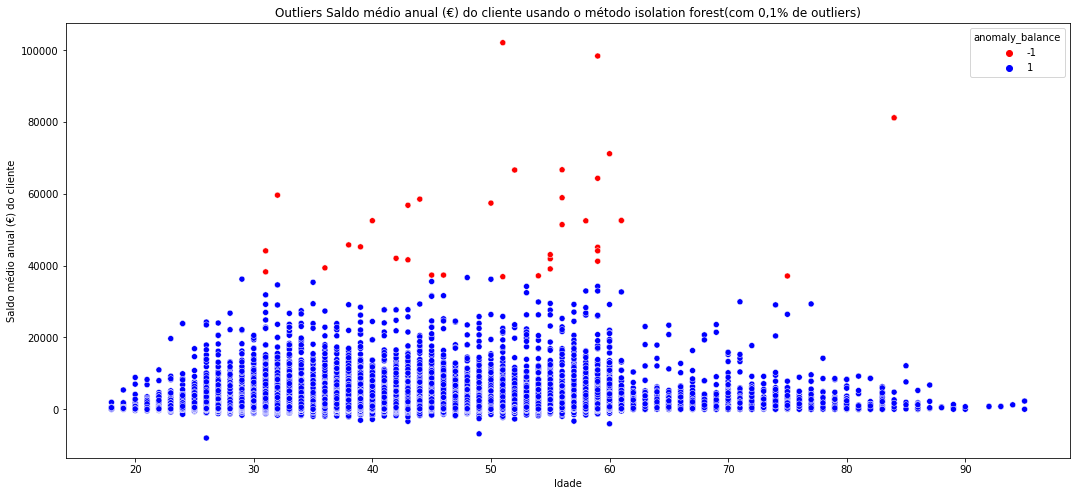

In [ ]:
dataset = bankFullDataset
column_name_x = "age"
column_name_y = "balance"
xlabel = 'Idade'
ylabel = 'Saldo médio anual (€) do cliente'

graphics_outliers_A(column_name_x, column_name_y, dataset, xlabel, ylabel)

In [ ]:
balance_o = dataset.loc[(dataset.anomaly_balance == -1)]
balanceOutliers = balance_o.count()
balanceOutliers

age                36
job                36
marital            36
education          36
default            36
balance            36
housing            36
loan               36
contact            36
day                36
month              36
duration           36
campaign           36
pdays              36
previous           36
poutcome           36
y                  36
anomaly_balance    36
dtype: int64

In [ ]:
print("Existem " + str(balanceOutliers[0]) + " outliers no atributo '" + column_name_y + "'.")

Existem 36 outliers no atributo 'balance'.


### Outliers Age Vs Duration

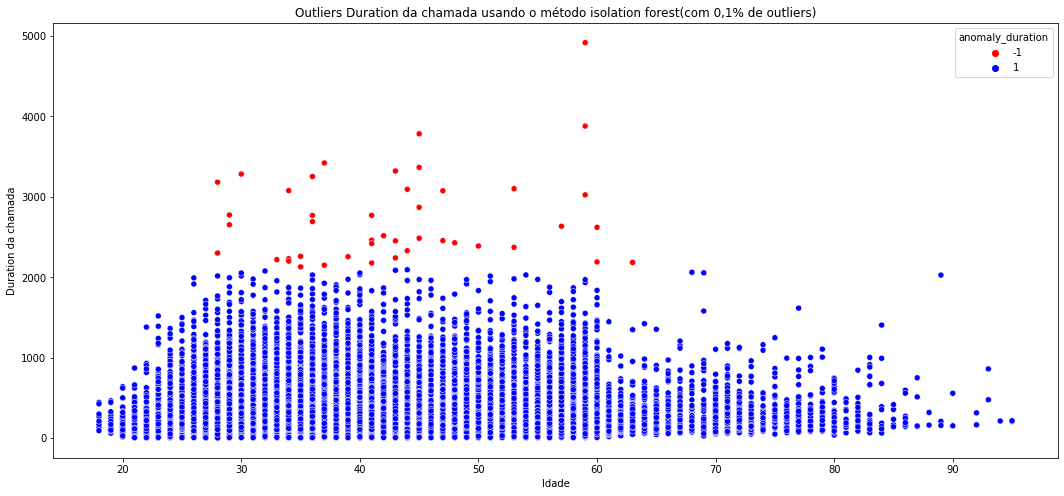

In [ ]:
column_name_x = "age"
column_name_y = "duration"
xlabel = 'Idade'
ylabel = 'Duration da chamada'

graphics_outliers_A(column_name_x, column_name_y, dataset, xlabel, ylabel)

In [ ]:
duration_o = dataset.loc[(dataset.anomaly_duration == -1)]
durationOutliers = duration_o.count()
durationOutliers

age                 45
job                 45
marital             45
education           45
default             45
balance             45
housing             45
loan                45
contact             45
day                 45
month               45
duration            45
campaign            45
pdays               45
previous            45
poutcome            45
y                   45
anomaly_balance     45
anomaly_duration    45
dtype: int64

In [ ]:
print("Existem " + str(durationOutliers[0]) + " outliers no atributo '" + column_name_y + "'.")

Existem 45 outliers no atributo 'duration'.


### Outliers Age Vs Campaign

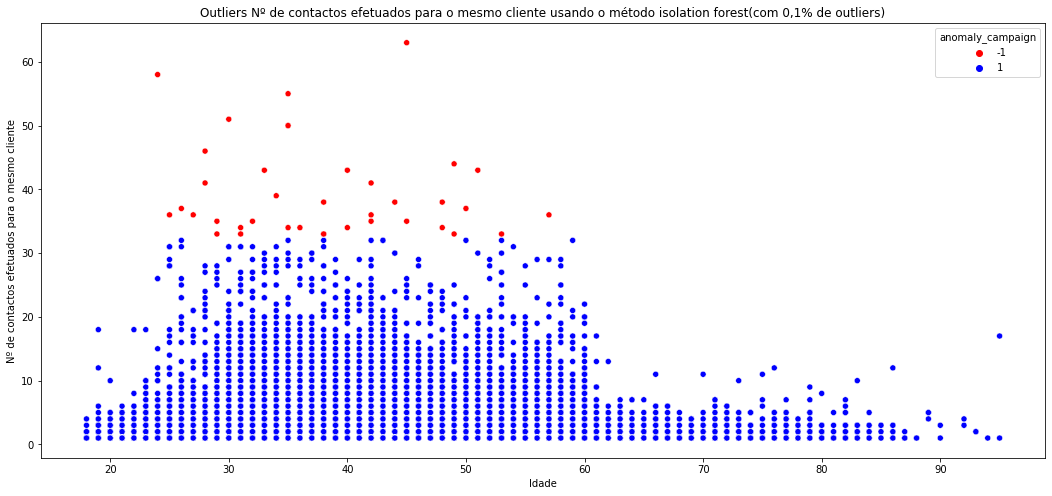

In [ ]:
column_name_x = "age"
column_name_y = "campaign"
xlabel = 'Idade'
ylabel = 'Nº de contactos efetuados para o mesmo cliente'

graphics_outliers_A(column_name_x, column_name_y, dataset, xlabel, ylabel)

In [ ]:
campaign_o = dataset.loc[(dataset.anomaly_campaign == -1)]
campaignOutliers = campaign_o.count()
campaignOutliers

age                 38
job                 38
marital             38
education           38
default             38
balance             38
housing             38
loan                38
contact             38
day                 38
month               38
duration            38
campaign            38
pdays               38
previous            38
poutcome            38
y                   38
anomaly_balance     38
anomaly_duration    38
anomaly_campaign    38
dtype: int64

In [ ]:
print("Existem " + str(campaignOutliers[0]) + " outliers no atributo '" + column_name_y + "'.")

Existem 38 outliers no atributo 'campaign'.


### Outliers Age Vs Pdays

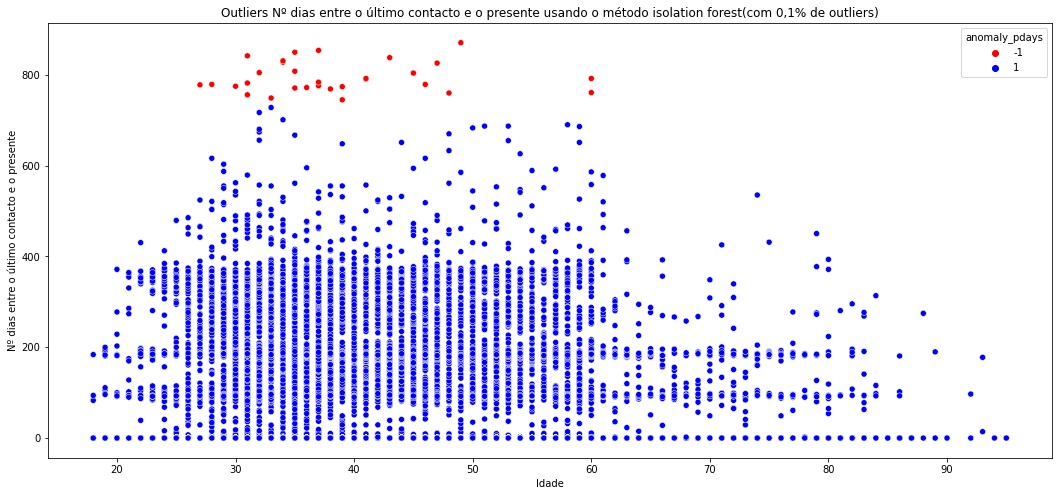

In [ ]:
column_name_x = "age"
column_name_y = "pdays"
xlabel = "Idade"
ylabel = "Nº dias entre o último contacto e o presente"

graphics_outliers_A(column_name_x, column_name_y, dataset, xlabel, ylabel)

In [ ]:
pdays_o = dataset.loc[(dataset.anomaly_pdays == -1)]
pdaysOutliers = pdays_o.count()
pdaysOutliers

age                 30
job                 30
marital             30
education           30
default             30
balance             30
housing             30
loan                30
contact             30
day                 30
month               30
duration            30
campaign            30
pdays               30
previous            30
poutcome            30
y                   30
anomaly_balance     30
anomaly_duration    30
anomaly_campaign    30
anomaly_pdays       30
dtype: int64

In [ ]:
print("Existem " + str(pdaysOutliers[0]) + " outliers no atributo '" + column_name_y + "'.")

Existem 30 outliers no atributo 'pdays'.


### Outliers Age Vs Previous

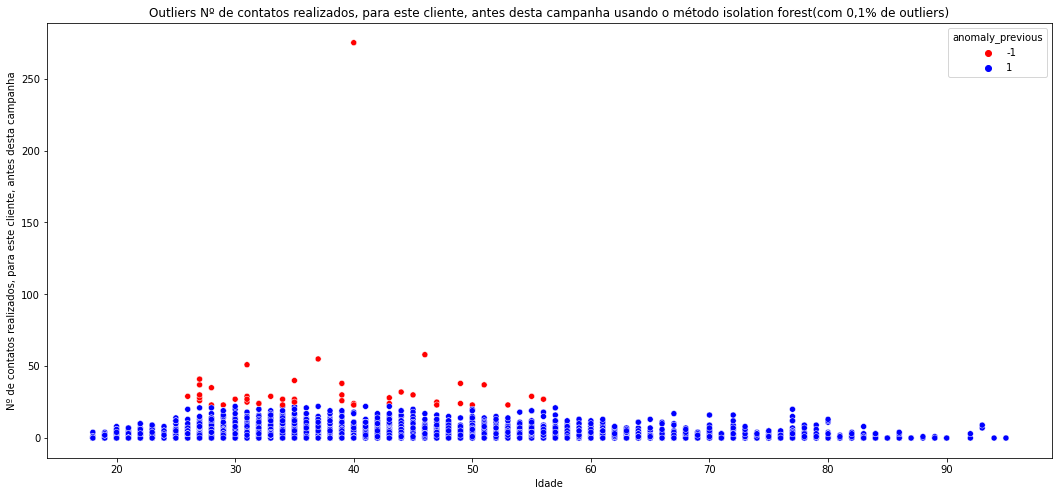

In [ ]:
column_name_x = "age"
column_name_y = "previous"
xlabel = 'Idade'
ylabel = 'Nº de contatos realizados, para este cliente, antes desta campanha'

graphics_outliers_A(column_name_x, column_name_y, dataset, xlabel, ylabel)

In [ ]:
previous_o = dataset.loc[(dataset.anomaly_previous == -1)]
previousOutliers = previous_o.count()
previousOutliers

age                 45
job                 45
marital             45
education           45
default             45
balance             45
housing             45
loan                45
contact             45
day                 45
month               45
duration            45
campaign            45
pdays               45
previous            45
poutcome            45
y                   45
anomaly_balance     45
anomaly_duration    45
anomaly_campaign    45
anomaly_pdays       45
anomaly_previous    45
dtype: int64

In [ ]:
print("Existem " + str(previousOutliers[0]) + " outliers no atributo '" + column_name_y + "'.")

Existem 45 outliers no atributo 'previous'.


##There are repeated outliers in *bankFullDataset*

In [ ]:
outliersBankFull = dataset.loc[(dataset.anomaly_balance == -1) | (dataset.anomaly_duration ==-1) | (dataset.anomaly_campaign ==-1) | (dataset.anomaly_pdays ==-1) | (dataset.anomaly_previous ==-1) ]
a = outliersBankFull.count()
print("Alguns outliers são repetidos (mesmo registo), existem um total de " + str(a[0]) + " outlies para este Dataset")

Alguns outliers são repetidos (mesmo registo), existem um total de 192 outlies para este Dataset


##Generate the new dataset

In [ ]:
new_bank = dataset.loc[(dataset.anomaly_balance != -1) & (dataset.anomaly_duration !=-1) & (dataset.anomaly_campaign !=-1) & (dataset.anomaly_pdays !=-1) & (dataset.anomaly_previous !=-1) ]
new_bank = new_bank[["age","job","marital","education","default","balance", "housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]]
new_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


##Generate CSV File Without Outliers - Just Run 1 Time!
**!!!Atenção:** o código deste capítulo está em comentário, porque depois de gerarmos o primeiro ficheiro, não pretendemos gerar mais nenhum. Esse ficheiro vai servir de base a todo o trabalho que for desenvolvido a partir daqui.

In [ ]:
new_bank.to_csv("/content/drive/MyDrive/SINO/2. Data Sets/1.2. 2ª Conversão - Sem Outliers/new_bank.csv",sep=';')

#Convertion on BankFull - 1º Type of Convertion

###Conversion of column values ​​and types



In [ ]:
bankFullDataset = pd.read_csv('/content/drive/MyDrive/SINO/2. Data Sets/1.2. 2ª Conversão - Sem Outliers/new_bank.csv' , sep = ';')

In [ ]:
bank_full = bankFullDataset.copy()

In [ ]:
############ job

In [ ]:
convert_bank_full_job = list(bank_full_job.loc[0:, 'job'])
for index, row in bank_full.iterrows():
  if(row['job'] == convert_bank_full_job[0]):
    bank_full.loc[index, 'job'] = "0"
  elif(row['job'] == convert_bank_full_job[1]):
    bank_full.loc[index, 'job'] = "1"
  elif(row['job'] == convert_bank_full_job[2]):
    bank_full.loc[index, 'job'] = "2"
  elif(row['job'] == convert_bank_full_job[3]):
    bank_full.loc[index, 'job'] = "3"
  elif(row['job'] == convert_bank_full_job[4]):
    bank_full.loc[index, 'job'] = "4"
  elif(row['job'] == convert_bank_full_job[5]):
    bank_full.loc[index, 'job'] = "5"
  elif(row['job'] == convert_bank_full_job[6]):
    bank_full.loc[index, 'job'] = "6"
  elif(row['job'] == convert_bank_full_job[7]):
    bank_full.loc[index, 'job'] = "7"
  elif(row['job'] == convert_bank_full_job[8]):
    bank_full.loc[index, 'job'] = "8"
  elif(row['job'] == convert_bank_full_job[9]):
    bank_full.loc[index, 'job'] = "9"
  elif(row['job'] == convert_bank_full_job[10]):
    bank_full.loc[index, 'job'] = "10"
  elif(row['job'] == convert_bank_full_job[11]):
    bank_full.loc[index, 'job'] = "11"

bank_full['job'] = bank_full['job'].astype(str).astype(int)

In [ ]:
############ marital

In [ ]:
convert_bank_full_marital = list(bank_full_marital.loc[0:, 'marital'])
for index, row in bank_full.iterrows():
  if(row['marital'] == convert_bank_full_marital[0]):
    bank_full.loc[index, 'marital'] = "0"
  elif(row['marital'] == convert_bank_full_marital[1]):
    bank_full.loc[index, 'marital'] = "1"
  elif(row['marital'] == convert_bank_full_marital[2]):
    bank_full.loc[index, 'marital'] = "2"

bank_full['marital'] = bank_full['marital'].astype(str).astype(int)

In [ ]:
######### education

In [ ]:
convert_bank_full_education = list(bank_full_education.loc[0:, 'education'])
for index, row in bank_full.iterrows():
  if(row['education'] == convert_bank_full_education[0]):
    bank_full.loc[index, 'education'] = "0"
  elif(row['education'] == convert_bank_full_education[1]):
    bank_full.loc[index, 'education'] = "1"
  elif(row['education'] == convert_bank_full_education[2]):
    bank_full.loc[index, 'education'] = "2"
  elif(row['education'] == convert_bank_full_education[3]):
    bank_full.loc[index, 'education'] = "3"

bank_full['education'] = bank_full['education'].astype(str).astype(int)

In [ ]:
######### default

In [ ]:
convert_bank_full_default = list(bank_full_default.loc[0:, 'default'])
for index, row in bank_full.iterrows():
  if(row['default'] == convert_bank_full_default[0]):
    bank_full.loc[index, 'default'] = "0"
  elif(row['default'] == convert_bank_full_default[1]):
    bank_full.loc[index, 'default'] = "1"

bank_full['default'] = bank_full['default'].astype(str).astype(int)

In [ ]:
######### housing

In [ ]:
for index, row in bank_full.iterrows():
  if(row['housing'] == "no"):
    bank_full.loc[index, 'housing'] = "0"
  elif(row['housing'] == "yes"):
    bank_full.loc[index, 'housing'] = "1"

bank_full['housing'] = bank_full['housing'].astype(str).astype(int)

In [ ]:
######### loan

In [ ]:
for index, row in bank_full.iterrows():
  if(row['loan'] == "no"):
    bank_full.loc[index, 'loan'] = "0"
  elif(row['loan'] == "yes"):
    bank_full.loc[index, 'loan'] = "1"

bank_full['loan'] = bank_full['loan'].astype(str).astype(int)

In [ ]:
######### contact

In [ ]:
convert_bank_full_contact = list(bank_full_contact.loc[0:, 'contact'])
for index, row in bank_full.iterrows():
  if(row['contact'] == convert_bank_full_contact[0]):
    bank_full.loc[index, 'contact'] = "0"
  elif(row['contact'] == convert_bank_full_contact[1]):
    bank_full.loc[index, 'contact'] = "1"
  elif(row['contact'] == convert_bank_full_contact[2]):
    bank_full.loc[index, 'contact'] = "2"

bank_full['contact'] = bank_full['contact'].astype(str).astype(int)

In [ ]:
######### month

In [ ]:
convert_bank_full_month = list(bank_full_month.loc[0:, 'month'])
for index, row in bank_full.iterrows():
  if(row['month'] == convert_bank_full_month[0]):
    bank_full.loc[index, 'month'] = "0"
  elif(row['month'] == convert_bank_full_month[1]):
    bank_full.loc[index, 'month'] = "1"
  elif(row['month'] == convert_bank_full_month[2]):
    bank_full.loc[index, 'month'] = "2"
  elif(row['month'] == convert_bank_full_month[3]):
    bank_full.loc[index, 'month'] = "3"
  elif(row['month'] == convert_bank_full_month[4]):
    bank_full.loc[index, 'month'] = "4"
  elif(row['month'] == convert_bank_full_month[5]):
    bank_full.loc[index, 'month'] = "5"
  elif(row['month'] == convert_bank_full_month[6]):
    bank_full.loc[index, 'month'] = "6"
  elif(row['month'] == convert_bank_full_month[7]):
    bank_full.loc[index, 'month'] = "7"
  elif(row['month'] == convert_bank_full_month[8]):
    bank_full.loc[index, 'month'] = "8"
  elif(row['month'] == convert_bank_full_month[9]):
    bank_full.loc[index, 'month'] = "9"
  elif(row['month'] == convert_bank_full_month[10]):
    bank_full.loc[index, 'month'] = "10"
  elif(row['month'] == convert_bank_full_month[11]):
    bank_full.loc[index, 'month'] = "11"

bank_full['month'] = bank_full['month'].astype(str).astype(int)

In [ ]:
######### poutcome

In [ ]:
convert_bank_full_poutcome = list(bank_full_poutcome.loc[0:, 'poutcome'])
for index, row in bank_full.iterrows():
  if(row['poutcome'] == convert_bank_full_poutcome[0]):
    bank_full.loc[index, 'poutcome'] = "0"
  elif(row['poutcome'] == convert_bank_full_poutcome[1]):
    bank_full.loc[index, 'poutcome'] = "1"
  elif(row['poutcome'] == convert_bank_full_poutcome[2]):
    bank_full.loc[index, 'poutcome'] = "2"
  elif(row['poutcome'] == convert_bank_full_poutcome[3]):
    bank_full.loc[index, 'poutcome'] = "3"
  
bank_full['poutcome'] = bank_full['poutcome'].astype(str).astype(int)

In [ ]:
######### y

In [ ]:
for index, row in bank_full.iterrows():
  if(row['y'] == "no"):
    bank_full.loc[index, 'y'] = "0"
  elif(row['y'] == "yes"):
    bank_full.loc[index, 'y'] = "1"
  
bank_full['y'] = bank_full['y'].astype(str).astype(int)

###Conversion of datasets to CSV files - Just Run 1 Time!
**!!!Atenção:** o código deste capítulo está em comentário, porque depois de gerarmos o primeiro ficheiro, não pretendemos gerar mais nenhum. Esse ficheiro vai servir de base ao trabalho que for desenvolvido a partir daqui.

In [ ]:
#bank_full

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45015,45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45016,45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45017,45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
#compression_opts = dict(method='zip', archive_name='bankFullConvertion.csv')
#bank_full.to_csv('new_bankFullConvertion.zip', index=False, compression=compression_opts)

### Read datasets convertion 

In [32]:
bankFullDatasetConvertion = pd.read_csv('/content/drive/MyDrive/SINO/2. Data Sets/1.1. 1ª Conversão/bankFullConvertion.csv' , sep = ',')

###Info datasets convertion


In [33]:
bankFullDatasetConvertion[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',	'campaign',	'pdays',	'previous', 'poutcome', 'y']].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


# Dataset BankFull Wiyhout Outliers and After 1ª Convertion

In [ ]:
dataset_2 = bankFullDatasetConvertion

In [ ]:
dataset_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
dataset_2[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',	'campaign',	'pdays',	'previous', 'poutcome', 'y']].describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [ ]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [ ]:
bank_full_age = caracteristicas_dados('age', dataset_2)
bank_full_age

id,age
0,18
1,19
2,20
3,21
4,22
...,...
72,90
73,92
74,93
75,94


In [ ]:
bank_full_job = caracteristicas_dados('job', dataset_2)
bank_full_job

id,job
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
bank_full_marital = caracteristicas_dados('marital', dataset_2)
bank_full_marital

id,marital
0,0
1,1
2,2


In [ ]:
bank_full_education = caracteristicas_dados('education', dataset_2)
bank_full_education

id,education
0,0
1,1
2,2
3,3


In [ ]:
bank_full_default = caracteristicas_dados('default', dataset_2)
bank_full_default

id,default
0,0
1,1


In [ ]:
bank_full_balance = caracteristicas_dados('balance', dataset_2)
bank_full_balance

id,balance
0,-8019
1,-6847
2,-4057
3,-3372
4,-3313
...,...
7163,66721
7164,71188
7165,81204
7166,98417


In [ ]:
bank_full_housing = caracteristicas_dados('housing', dataset_2)
bank_full_housing

id,housing
0,0
1,1


In [ ]:
bank_full_loan = caracteristicas_dados('loan', dataset_2)
bank_full_loan

id,loan
0,0
1,1


In [ ]:
bank_full_contact = caracteristicas_dados('contact', dataset_2)
bank_full_contact

id,contact
0,0
1,1
2,2


In [ ]:
bank_full_day = caracteristicas_dados('day', dataset_2)
bank_full_day

id,day
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
bank_full_month = caracteristicas_dados('month', dataset_2)
bank_full_month

id,month
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
bank_full_duration = caracteristicas_dados('duration', dataset_2)
bank_full_duration

id,duration
0,0
1,1
2,2
3,3
4,4
...,...
1568,3366
1569,3422
1570,3785
1571,3881


In [ ]:
bank_full_campaign = caracteristicas_dados('campaign', dataset_2)
bank_full_campaign

id,campaign
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
bank_full_pdays = caracteristicas_dados('pdays', dataset_2)
bank_full_pdays

id,pdays
0,-1
1,1
2,2
3,3
4,4
...,...
554,838
555,842
556,850
557,854


In [ ]:
bank_full_previous = caracteristicas_dados('previous', dataset_2)
bank_full_previous

id,previous
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
bank_full_poutcome = caracteristicas_dados('poutcome', dataset_2)
bank_full_poutcome

id,poutcome
0,0
1,1
2,2
3,3


In [ ]:
bank_full_y = caracteristicas_dados('y', dataset_2)
bank_full_y

id,y
0,0
1,1


#Univariate Analysis Charts - BankFull


In [ ]:
dataset = bankFullDatasetConvertion
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


##Graphics Age 
(Definition of Age Groups)

In [ ]:
nameColumn_name = ['18 a 29', '30 a 40', '41 a 51', '52 a 62', '63 a 73', '74 a 84', '85 a 95']
nameColumn_name_2 = [[18, 29],[30,40],[41,51],[52,62],[63,73],[74,84],[85,95]]
column_name = 'age'
column_name_1 = 'FaixaEtaria'
column_name_2 = '%Yes'
column_name_3 = '%No'
column_name_4 = '%Total'

table1 = graphics_table_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, column_name_1, column_name_2, column_name_3, column_name_4)
table1

,FaixaEtaria,%Yes,%No,%Total
1,30 a 40,4.487846,38.519387,43.007233
2,41 a 51,2.424189,24.505098,26.929287
0,18 a 29,2.052598,9.610493,11.663091
3,52 a 62,1.835836,14.438964,16.274800
4,63 a 73,0.577293,0.802902,1.380195
5,74 a 84,0.280905,0.393709,0.674615
6,85 a 95,0.039813,0.030966,0.070779


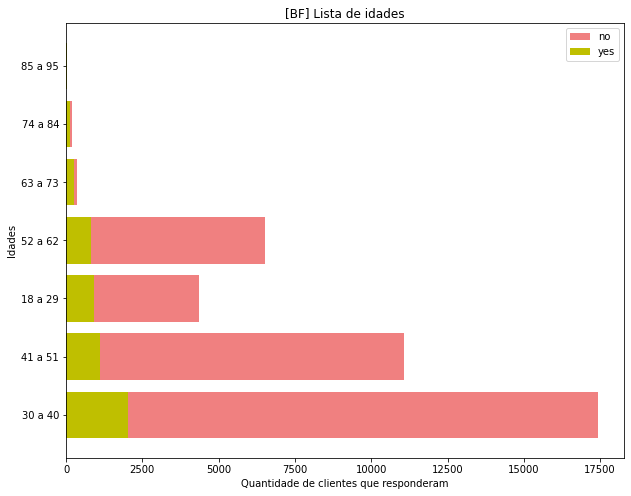

In [ ]:
nameColumn_name = ['18 a 29', '30 a 40', '41 a 51', '52 a 62', '63 a 73', '74 a 84', '85 a 95']
nameColumn_name_2 = [[18, 29],[30,40],[41,51],[52,62],[63,73],[74,84],[85,95]]
column_name = 'age'
ylabel = 'Idades'
title = '[BF] Lista de idades'
color1 = 'lightcoral'
color2 = 'y'
xlabel = 'Quantidade de clientes que responderam'

graphics_bar_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, xlabel, ylabel, title, color1, color2)

##Graphics Job


In [ ]:
b_jobFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_job, dataset, 'job')
b_jobFull

,job,job_convertion,%no,%yes,%total
4,management,4,18.042069,2.877618,20.919688
9,technician,9,14.945478,1.857955,16.803433
1,blue-collar,1,19.959744,1.565991,21.525735
0,admin.,0,10.041804,1.395678,11.437482
5,retired,5,3.866316,1.141315,5.007631
7,services,7,8.371856,0.816173,9.188029
8,student,8,1.479728,0.594988,2.074716
10,unemployed,10,2.435248,0.446794,2.882042
6,self-employed,6,3.078897,0.413616,3.492513
2,entrepreneur,2,3.016965,0.272058,3.289023


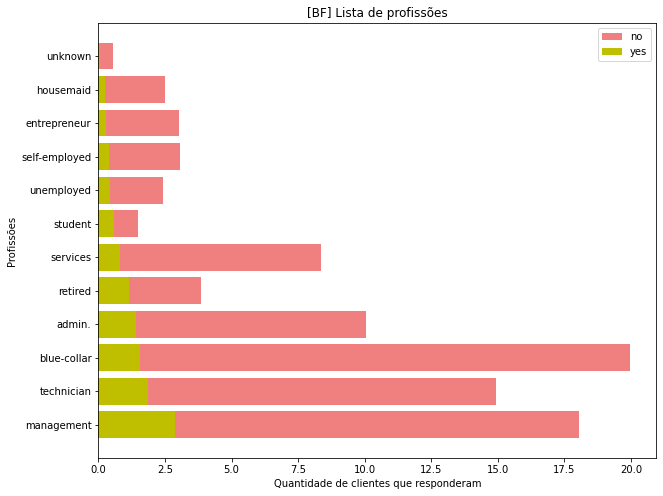

In [ ]:
ii = graphics_bar_VLD(b_jobFull, 'job','%yes','%no', 'Quantidade de clientes que responderam', 'Profissões', '[BF] Lista de profissões', 'lightcoral', 'y')

##Graphics Marital

In [ ]:
b_maritalFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_marital, dataset, 'marital')
b_maritalFull

,marital,marital_convertion,%no,%yes,%total
1,married,1,54.099666,6.093650,60.193316
2,single,2,24.060516,4.229059,28.289576
0,divorced,0,10.141337,1.375771,11.517109


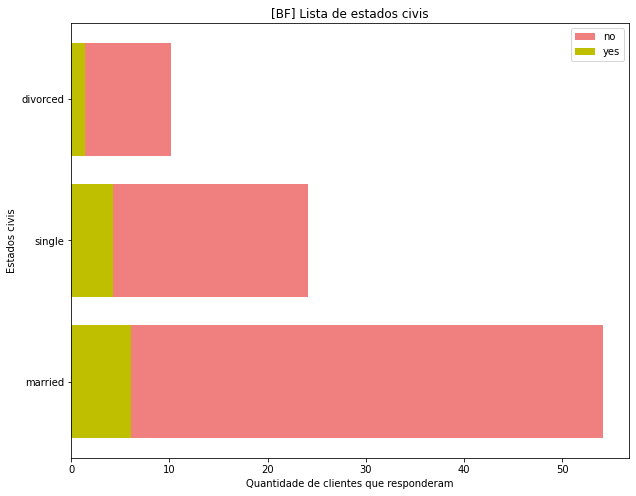

In [ ]:
graphics_bar_VLD(b_maritalFull, 'marital','%yes','%no', 'Quantidade de clientes que responderam', 'Estados civis', '[BF] Lista de estados civis', 'lightcoral', 'y')

##Graphics Education

In [ ]:
b_educationFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_education, dataset, 'education')
b_educationFull

,education,education_convertion,%no,%yes,%total
1,secondary,1,45.900334,5.419035,51.319369
2,tertiary,2,25.004977,4.414855,29.419831
0,primary,0,13.846188,1.307204,15.153392
3,unknown,3,3.550021,0.557386,4.107407


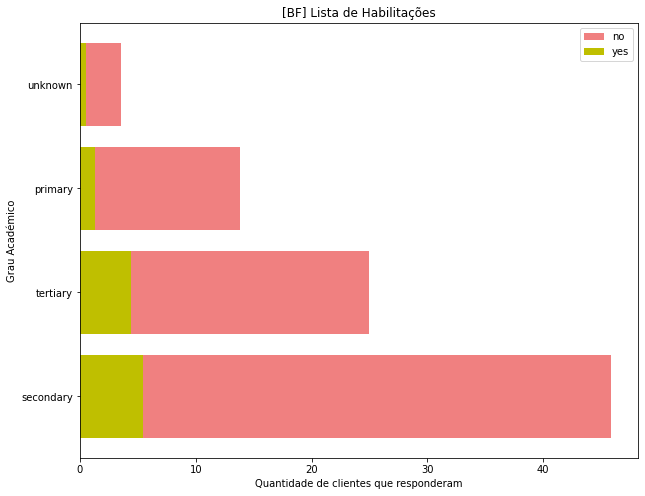

In [ ]:
graphics_bar_VLD(b_educationFull, 'education','%yes','%no', 'Quantidade de clientes que responderam', 'Grau Académico', '[BF] Lista de Habilitações', 'lightcoral', 'y')

##Graphics Default

In [ ]:
b_defaultFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_default, dataset, 'default')
b_defaultFull

,default,default_convertion,%no,%yes,%total
0,no,0,86.613877,11.583464,98.197341
1,yes,1,1.687642,0.115016,1.802659


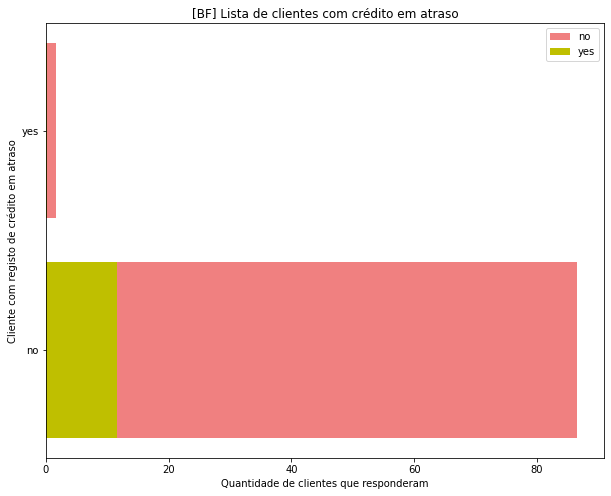

In [ ]:
graphics_bar_VLD(b_defaultFull, 'default','%yes','%no', 'Quantidade de clientes que responderam', 'Cliente com registo de crédito em atraso', '[BF] Lista de clientes com crédito em atraso', 'lightcoral', 'y')

##Graphics Balance 
(Definition of salary ranges)

In [ ]:
nameColumn_name = ['-8019 a 0', '1 a 72', '73 a 448', '449 a 1428', '1429 a 102127']
nameColumn_name_2 = [[-8019, 0],[1, 72],[73, 448],[449, 1428],[1429, 102127]]
dataset = bankFullDatasetConvertion
column_name = 'balance'
column_name_1 = 'SaldoMédioBancário'
column_name_2 = 'QtdYes'
column_name_3 = 'QtdNo'
column_name_4 = 'QtdTotal'

graphics_table_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, column_name_1, column_name_2, column_name_3, column_name_4)

,SaldoMédioBancário,QtdYes,QtdNo,QtdTotal
4,1429 a 102127,4.036628,20.950654,24.987282
3,449 a 1428,3.129769,21.877419,25.007189
2,73 a 448,2.720577,22.253434,24.974011
0,-8019 a 0,1.110349,14.991927,16.102276
1,1 a 72,0.701157,8.228086,8.929243


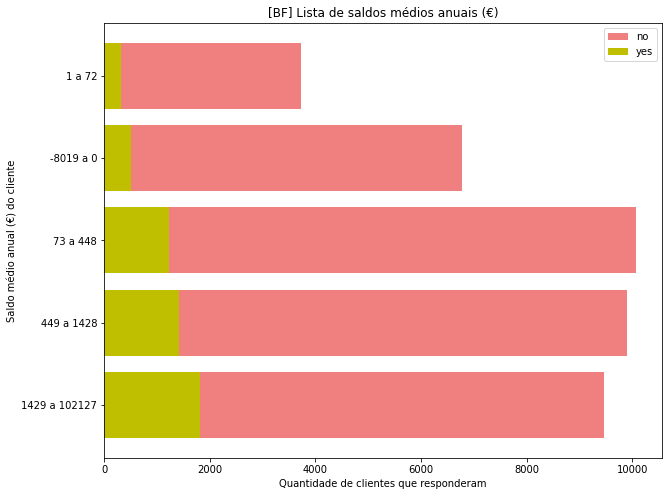

In [ ]:
nameColumn_name = ['-8019 a 0', '1 a 72', '73 a 448', '449 a 1428', '1429 a 102127']
nameColumn_name_2 = [[-8019, 0],[1, 72],[73, 448],[449, 1428],[1429, 102127]]
dataset = bankFullDatasetConvertion
column_name = 'balance'
ylabel = 'Saldo médio anual (€) do cliente'
title = '[BF] Lista de saldos médios anuais (€)'
color1 = 'lightcoral'
color2 = 'y'
xlabel = 'Quantidade de clientes que responderam'

graphics_bar_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, xlabel, ylabel, title, color1, color2)

##Graphics Housing

In [ ]:
b_housingFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_housing, dataset, 'housing')
b_housingFull

,housing,housing_convertion,%no,%yes,%total
0,no,0,36.997633,7.418549,44.416182
1,yes,1,51.303886,4.279932,55.583818


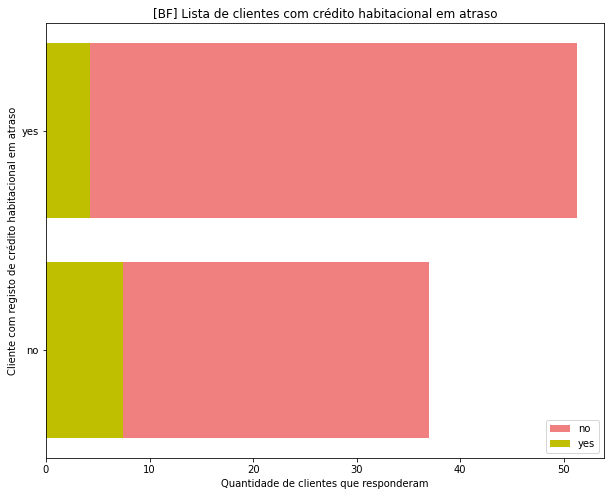

In [ ]:
graphics_bar_VLD(b_housingFull, 'housing','%yes','%no', 'Quantidade de clientes que responderam', 'Cliente com registo de crédito habitacional em atraso', '[BF] Lista de clientes com crédito habitacional em atraso', 'lightcoral', 'y')

##Graphics Loan
1. Graphics Loan bankFull
2. Graphics Loan bankAdditionalFull

In [ ]:
b_loanFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_loan, dataset, 'loan')
b_loanFull

,loan,loan_convertion,%no,%yes,%total
0,no,0,73.349406,10.627945,83.977351
1,yes,1,14.952113,1.070536,16.022649


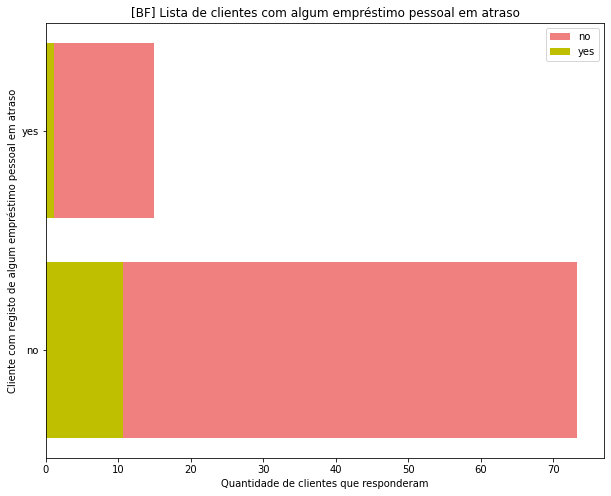

In [ ]:
graphics_bar_VLD(b_loanFull, 'loan','%yes','%no', 'Quantidade de clientes que responderam', 'Cliente com registo de algum empréstimo pessoal em atraso', '[BF] Lista de clientes com algum empréstimo pessoal em atraso', 'lightcoral', 'y')

##Graphics Contact

In [ ]:
b_contactFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_contact, dataset, 'contact')
b_contactFull

,contact,contact_convertion,%no,%yes,%total
0,cellular,0,55.110482,9.663577,64.774059
2,unknown,2,27.626020,1.172281,28.798301
1,telephone,1,5.565017,0.862622,6.427639


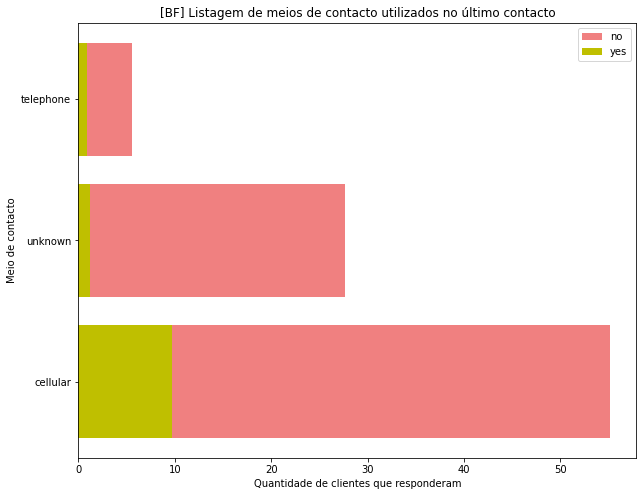

In [ ]:
graphics_bar_VLD(b_contactFull, 'contact','%yes','%no', 'Quantidade de clientes que responderam', 'Meio de contacto', '[BF] Listagem de meios de contacto utilizados no último contacto', 'lightcoral', 'y')

##Graphics Day

In [ ]:
nameColumn_name = ['1 a 8', '9 a 16', '17 a 21', '22 a 31']
nameColumn_name_2 = [[1, 8],[9, 16],[17, 21],[22, 31]]
dataset = bankFullDatasetConvertion
column_name = 'day'
column_name_1 = 'Intervalo de dias'
column_name_2 = 'QtdYes'
column_name_3 = 'QtdNo'
column_name_4 = 'QtdTotal'

graphics_table_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, column_name_1, column_name_2, column_name_3, column_name_4)

,Intervalo de dias,QtdYes,QtdNo,QtdTotal
1,9 a 16,3.552233,22.366238,25.918471
0,1 a 8,3.171794,22.574152,25.745947
3,22 a 31,2.941762,21.545642,24.487404
2,17 a 21,2.032691,21.815487,23.848179


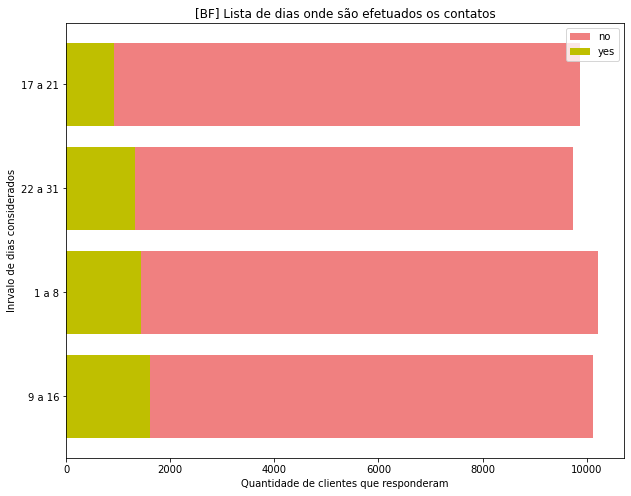

In [ ]:
nameColumn_name = ['1 a 8', '9 a 16', '17 a 21', '22 a 31']
nameColumn_name_2 = [[1, 8],[9, 16],[17, 21],[22, 31]]
dataset = bankFullDatasetConvertion
column_name = 'day'
ylabel = 'Inrvalo de dias considerados'
title = '[BF] Lista de dias onde são efetuados os contatos'
color1 = 'lightcoral'
color2 = 'y'
xlabel = 'Quantidade de clientes que responderam'

graphics_bar_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, xlabel, ylabel, title, color1, color2)

##Graphics Month

In [ ]:
b_monthFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_month, dataset, 'month')
b_monthFull

,month,month_convertion,%no,%yes,%total
8,may,8,28.402380,2.045962,30.448342
1,aug,1,12.295680,1.521754,13.817434
5,jul,5,13.863883,1.386831,15.250713
0,apr,0,5.208909,1.276238,6.485147
6,jun,6,10.605826,1.207671,11.813497
3,feb,3,4.883767,0.975426,5.859194
9,nov,9,7.889673,0.891376,8.781049
10,oct,10,0.917918,0.714428,1.632346
11,sep,11,0.685674,0.594988,1.280662
7,mar,7,0.506514,0.548539,1.055053


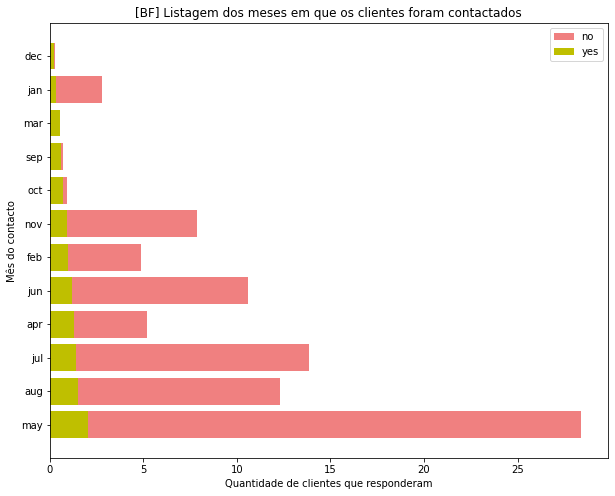

In [ ]:
graphics_bar_VLD(b_monthFull, 'month','%yes','%no', 'Quantidade de clientes que responderam', 'Mês do contacto', '[BF] Listagem dos meses em que os clientes foram contactados', 'lightcoral', 'y')

##Graphics Duration
1. Graphics Duration bankFull
2. Graphics Duration bankAdditionalFull

In [ ]:
nameColumn_name = ['0 a 103', '104 a 180', '181 a 319', '320 a 4918']
nameColumn_name_2 = [[0, 103],[104, 180],[181, 319],[320, 4918]]
dataset = bankFullDatasetConvertion
column_name = 'duration'
column_name_1 = column_name 
column_name_2 = 'QtdYes'
column_name_3 = 'QtdNo'
column_name_4 = 'QtdTotal'

graphics_table_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, column_name_1, column_name_2, column_name_3, column_name_4)

,duration,QtdYes,QtdNo,QtdTotal
3,320 a 4918,7.332286,17.575369,24.907655
2,181 a 319,2.797992,22.173807,24.971799
1,104 a 180,1.287297,23.673442,24.960740
0,0 a 103,0.280905,24.878901,25.159806


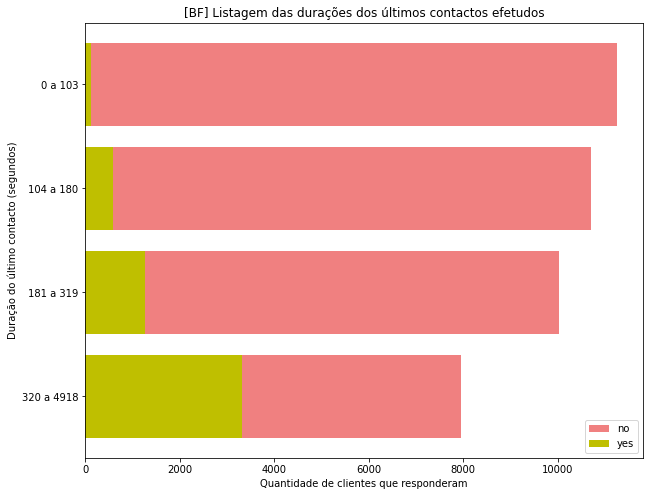

In [ ]:
nameColumn_name = ['0 a 103', '104 a 180', '181 a 319', '320 a 4918']
nameColumn_name_2 = [[0, 103],[104, 180],[181, 319],[320, 4918]]
dataset = bankFullDatasetConvertion
column_name = 'duration'
ylabel = 'Duração do último contacto (segundos)'
title = '[BF] Listagem das durações dos últimos contactos efetudos'
color1 = 'lightcoral'
color2 = 'y'
xlabel = 'Quantidade de clientes que responderam'

graphics_bar_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, xlabel, ylabel, title, color1, color2)


##Graphics Campaign
1. Graphics Campaign bankFull
2. Graphics Campaign bankAdditionalFull

In [ ]:
nameColumn_name = ['1', '2 a 3', '4 a 63']
nameColumn_name_2 = [[1, 1],[2, 3],[4, 63]]
dataset = bankFullDatasetConvertion
column_name = 'campaign'
column_name_1 = column_name 
column_name_2 = 'QtdYes'
column_name_3 = 'QtdNo'
column_name_4 = 'QtdTotal'

graphics_table_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, column_name_1, column_name_2, column_name_3, column_name_4)

,campaign,QtdYes,QtdNo,QtdTotal
0,1,5.664551,33.140165,38.804716
1,2 a 3,4.465727,35.405101,39.870828
2,4 a 63,1.568202,19.756254,21.324456


In [ ]:
bankFullDatasetConvertion


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


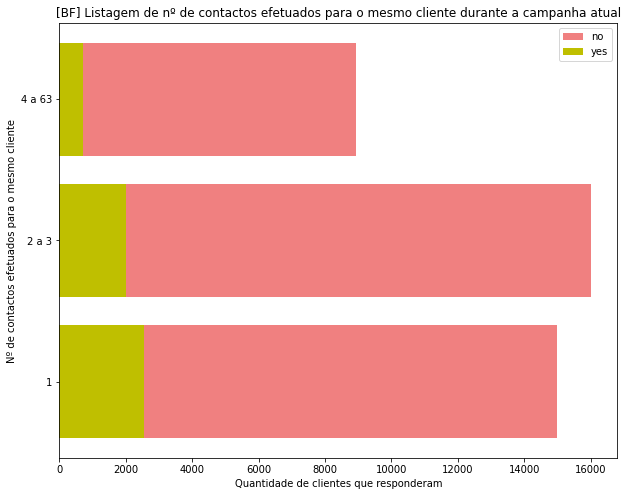

In [ ]:
nameColumn_name = ['1', '2 a 3', '4 a 63']
nameColumn_name_2 = [[1, 1],[2, 3],[4, 63]]
dataset = bankFullDatasetConvertion
column_name = 'campaign'
ylabel = 'Nº de contactos efetuados para o mesmo cliente'
title = '[BF] Listagem de nº de contactos efetuados para o mesmo cliente durante a campanha atual'
color1 = 'lightcoral'
color2 = 'y'
xlabel = 'Quantidade de clientes que responderam'

graphics_bar_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, xlabel, ylabel, title, color1, color2)


##Graphics Pdays

In [ ]:
b_pdaysFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_pdays, dataset, 'pdays')
b_pdaysFull

,pdays,pdays_convertion,%no,%yes,%total
0,-1,-1,74.251841,7.484904,81.736745
89,92,92,0.112804,0.212338,0.325142
179,182,182,0.192431,0.176948,0.369379
88,91,91,0.112804,0.165889,0.278693
178,181,181,0.095110,0.163677,0.258787
...,...,...,...,...,...
133,136,136,0.033178,0.000000,0.033178
447,464,464,0.002212,0.000000,0.002212
448,465,465,0.002212,0.000000,0.002212
450,467,467,0.002212,0.000000,0.002212


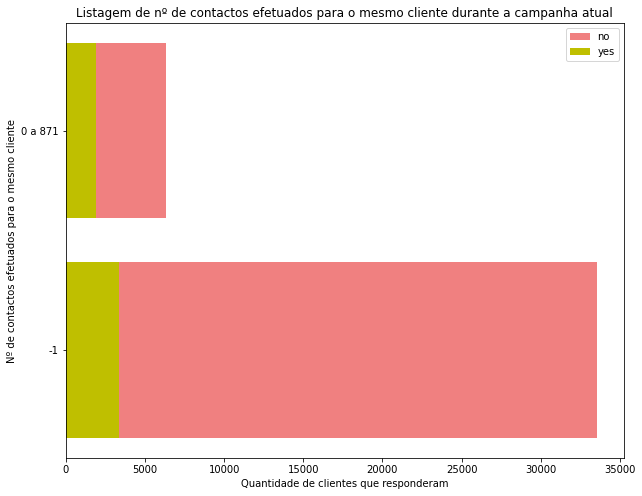

In [ ]:
nameColumn_name = ['-1', '0 a 871']
nameColumn_name_2 = [[-1, -1],[0, 871]]
dataset = bankFullDatasetConvertion
column_name = 'pdays'
ylabel = 'Nº de contactos efetuados para o mesmo cliente'
title = 'Listagem de nº de contactos efetuados para o mesmo cliente durante a campanha atual'
color1 = 'lightcoral'
color2 = 'y'
xlabel = 'Quantidade de clientes que responderam'

graphics_bar_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, xlabel, ylabel, title, color1, color2)

In [ ]:
print("Este atributo significa o número de dias que decorreram entre o último contacto e o presente.")
print("Sendo que '-1' significa que o cliente não foi contatado anteriormente.")
print("Como a percentagem de clientes a não terem sido contactados anteriormente é de aproximadamente 82%.")
print("Para conseguirmos ter perceção dos outros dados, precisamos retirar da amostra, os que são relativos à resposta '-1'.")

Este atributo significa o número de dias que decorreram entre o último contacto e o presente.
Sendo que '-1' significa que o cliente não foi contatado anteriormente.
Como a percentagem de clientes a não terem sido contactados anteriormente é de aproximadamente 82%.
Para conseguirmos ter perceção dos outros dados, precisamos retirar da amostra, os que são relativos à resposta '-1'.


In [ ]:
############################## Código para retirar o '-1' da datase completo da amostra

dataset_pdays_Sem1 = bankFullDatasetConvertion.query('pdays != -1')

In [ ]:
############################## Código para retirar o '-1' da datase da coluna de código único da amostra

bank_full_pdays_Sem1 = bank_full_pdays.query('pdays != -1')

In [ ]:
############################## Nova Tabela

b_pdaysFull_Sem1 = generate_table_percentage_by_yes_no_VLD_B(bank_full_pdays_Sem1, dataset_pdays_Sem1, 'pdays')
b_pdaysFull_Sem1

,pdays,pdays_convertion,%no,%yes,%total
88,92,92,0.617658,1.162650,1.780308
178,182,182,1.053651,0.968875,2.022526
87,91,91,0.617658,0.908320,1.525978
177,181,181,0.520770,0.896209,1.416980
179,183,183,0.750878,0.775100,1.525978
...,...,...,...,...,...
132,136,136,0.181664,0.000000,0.181664
446,464,464,0.012111,0.000000,0.012111
447,465,465,0.012111,0.000000,0.012111
449,467,467,0.012111,0.000000,0.012111


In [ ]:
print ('Uma vez que existem 558 possibilidades é necessário perceber os intervalos de agrupamento dos dados.')
print ('Para isso vamos ver, para este novo intervalo de valores, qual o novo minimo, quartis e o máximo.')

Uma vez que existem 558 possibilidades é necessário perceber os intervalos de agrupamento dos dados.
Para isso vamos ver, para este novo intervalo de valores, qual o novo minimo, quartis e o máximo.


In [ ]:
############################## Ver os quartis, máximo e minímos do novo 'intervalo' de dados
dataset_pdays_Sem1[['pdays']].describe()

,pdays
count,8257.000000
mean,224.577692
std,115.344035
min,1.000000
25%,133.000000
50%,194.000000
75%,327.000000
max,871.000000


In [ ]:
print('Intervalos: [1 ; 133] ; [134 ; 194] ; [195 ; 327] ; [328 ; 871]')

Intervalos: [1 ; 133] ; [134 ; 194] ; [195 ; 327] ; [328 ; 871]


In [ ]:
############################## Nova Tabela
nameColumn_name = ['1 a 133', '134 a 194', '195 a 327', '328 a 871']
nameColumn_name_2 = [[1, 133],[134, 194],[195, 327],[328, 871]]
dataset = dataset_pdays_Sem1
column_name = 'pdays'
column_name_1 = column_name 
column_name_2 = 'QtdYes'
column_name_3 = 'QtdNo'
column_name_4 = 'QtdTotal'

graphics_table_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, column_name_1, column_name_2, column_name_3, column_name_4)

,pdays,QtdYes,QtdNo,QtdTotal
0,1 a 133,9.107424,16.131767,25.239191
1,134 a 194,6.891123,17.875742,24.766864
3,328 a 871,3.596948,21.351580,24.948529
2,195 a 327,3.475839,21.569577,25.045416


In [ ]:
############################## Juntando tudo: tabela e gráfico

In [ ]:
dataset = bankFullDatasetConvertion

In [ ]:
nameColumn_name = ['-1','1 a 133', '134 a 194', '195 a 327', '328 a 871']
nameColumn_name_2 = [[-1, -1],[1, 133],[134, 194],[195, 327],[328, 871]]
dataset = dataset
column_name = 'pdays'
column_name_1 = column_name 
column_name_2 = 'QtdYes'
column_name_3 = 'QtdNo'
column_name_4 = 'QtdTotal'

graphics_table_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, column_name_1, column_name_2, column_name_3, column_name_4)

,pdays,QtdYes,QtdNo,QtdTotal
0,-1,7.484904,74.251841,81.736745
1,1 a 133,1.663312,2.946186,4.609498
2,134 a 194,1.258543,3.264692,4.523235
4,328 a 871,0.656920,3.899493,4.556413
3,195 a 327,0.634801,3.939307,4.574108


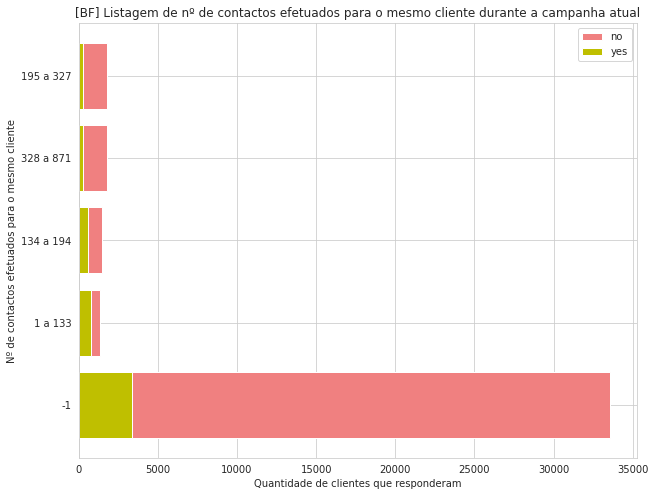

In [ ]:
nameColumn_name = ['-1','1 a 133', '134 a 194', '195 a 327', '328 a 871']
nameColumn_name_2 = [[-1,-1],[1, 133],[134, 194],[195, 327],[328, 871]]
dataset = dataset
column_name = 'pdays'
ylabel = 'Nº de contactos efetuados para o mesmo cliente'
title = '[BF] Listagem de nº de contactos efetuados para o mesmo cliente durante a campanha atual'
color1 = 'lightcoral'
color2 = 'y'
xlabel = 'Quantidade de clientes que responderam'

graphics_bar_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, xlabel, ylabel, title, color1, color2)

##Graphics Previous
1. Graphics Previous bankFull
2. Graphics Previous bankAdditionalFull

In [ ]:
dataset = bankFullDatasetConvertion

In [ ]:
b_previousFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_previous, dataset, 'previous')
b_previousFull

,previous,previous_convertion,%no,%yes,%total
0,0,0,74.251841,7.484904,81.736745
1,1,1,4.841742,1.289509,6.131251
2,2,2,3.649554,1.008604,4.658158
3,3,3,1.875650,0.650284,2.525934
4,4,4,1.201035,0.378227,1.579262
5,5,5,0.747606,0.267634,1.015240
6,6,6,0.429099,0.183584,0.612683
7,7,7,0.333990,0.119440,0.453429
8,8,8,0.199067,0.086262,0.285329
10,10,10,0.090686,0.057508,0.148194


In [ ]:
print("Este atributo representa o número de contatos realizados, para este cliente, antes desta campanha.")
print("Uma vez que, o número de clientes que nunca foram contactados antes desta campanha é de quase 82%.")
print("Vamos seguir o mesmo raciocinio aplicado no atributo 'pdays', para conseguirmos ter")
print("uma perceção dos outros dados.")

Este atributo representa o número de contatos realizados, para este cliente, antes desta campanha.
Uma vez que, o número de clientes que nunca foram contactados antes desta campanha é de quase 82%.
Vamos seguir o mesmo raciocinio aplicado no atributo 'pdays', para conseguirmos ter
uma perceção dos outros dados.


In [ ]:
############################## Código para retirar o '0' da datase completo da amostra
dataset_previous_Sem1 = bankFullDatasetConvertion.query('previous != 0')

In [ ]:
############################## Código para retirar o '-1' da datase da coluna de código único da amostra
bank_full_previous_Sem1 = bank_full_previous.query('previous != 0')

In [ ]:
############################## Nova Tabela

b_previousFull_Sem1 = generate_table_percentage_by_yes_no_VLD_B(bank_full_previous_Sem1, dataset_previous_Sem1, 'previous')
b_previousFull_Sem1

,previous,previous_convertion,%no,%yes,%total
0,1,1,26.510839,7.060676,33.571515
1,2,2,19.983045,5.522587,25.505632
2,3,3,10.270074,3.560615,13.830689
3,4,4,6.576238,2.070970,8.647208
4,5,5,4.093496,1.465423,5.558920
5,6,6,2.349522,1.005208,3.354729
6,7,7,1.828751,0.653991,2.482742
7,8,8,1.089984,0.472327,1.562311
9,10,10,0.496548,0.314884,0.811433
8,9,9,0.823544,0.290662,1.114206


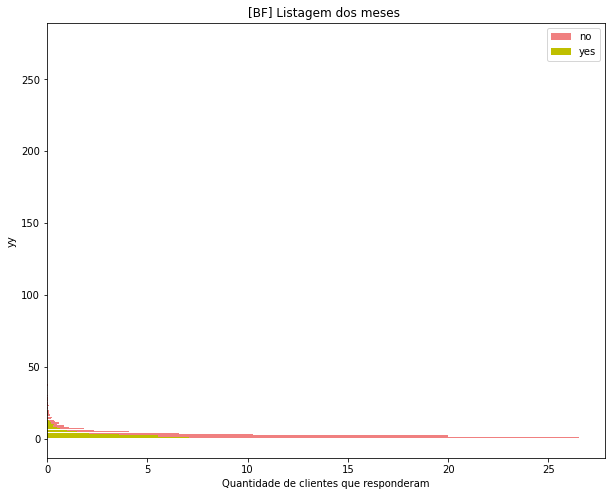

In [ ]:
graphics_bar_VLD(b_previousFull_Sem1, 'previous','%yes','%no', 'Quantidade de clientes que responderam', 'yy', '[BF] Listagem dos meses ', 'lightcoral', 'y')

In [ ]:
print ('Uma vez que o gráfico gerado com base nos dados, tal como estão, não é útil.')
print ('Vamos refazê-lo, mas por intervalos de valores. Mas para isso precisamos ')
print ('saber qual o novo minimo, quartis e o máximo.')

Uma vez que o gráfico gerado com base nos dados, tal como estão, não é útil.
Vamos refazê-lo, mas por intervalos de valores. Mas para isso precisamos 
saber qual o novo minimo, quartis e o máximo.


In [ ]:
############################## Ver os quartis, máximo e minímos do novo 'intervalo' de dados
dataset_previous_Sem1[['previous']].describe()

,previous
count,8257.000000
mean,3.177546
std,4.560820
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,275.000000


In [ ]:
print('Intervalos: [1] ; [1,01 ; 2] ; [2,01 ; 4] ; [4,01 ; 275]'),

Intervalos: [1] ; [1,01 ; 2] ; [2,01 ; 4] ; [4,01 ; 275]


(None,)

In [ ]:
############################## Nova Tabela
nameColumn_name = ['1', '1,01 a 2', '2,01 a 4', '4,01 a 275']
nameColumn_name_2 = [[1, 1],[1.01, 2],[2.01, 4],[4.01, 275]]
dataset = dataset_previous_Sem1
column_name = 'previous'
column_name_1 = column_name 
column_name_2 = 'QtdYes'
column_name_3 = 'QtdNo'
column_name_4 = 'QtdTotal'

graphics_table_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, column_name_1, column_name_2, column_name_3, column_name_4)

,previous,QtdYes,QtdNo,QtdTotal
0,1,7.060676,26.510839,33.571515
2,"2,01 a 4",5.631585,16.846312,22.477898
1,"1,01 a 2",5.522587,19.983045,25.505632
3,"4,01 a 275",4.856485,13.588470,18.444956


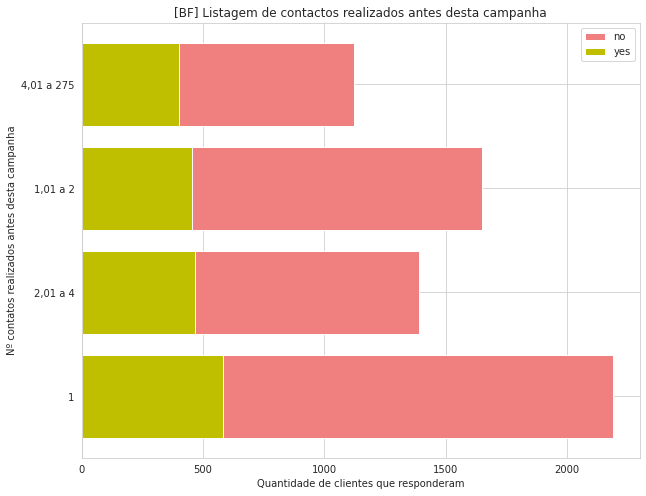

In [ ]:
############################## Novo Gráfico
nameColumn_name = ['1', '1,01 a 2', '2,01 a 4', '4,01 a 275']
nameColumn_name_2 = [[1, 1],[1.01, 2],[2.01, 4],[4.01, 275]]
dataset = dataset_previous_Sem1
column_name = 'previous'
ylabel = 'Nº contatos realizados antes desta campanha'
title = '[BF] Listagem de contactos realizados antes desta campanha'
color1 = 'lightcoral'
color2 = 'y'
xlabel = 'Quantidade de clientes que responderam'

graphics_bar_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, xlabel, ylabel, title, color1, color2)

In [ ]:
############################## Juntando tudo: tabela e gráfico

In [ ]:
dataset = bankFullDatasetConvertion

In [ ]:
nameColumn_name = ['0','1', '1,01 a 2', '2,01 a 4', '4,01 a 275']
nameColumn_name_2 = [[0, 0],[1, 1],[1.01, 2],[2.01, 4],[4.01, 275]]
dataset = dataset
column_name = 'previous'
column_name_1 = column_name 
column_name_2 = 'QtdYes'
column_name_3 = 'QtdNo'
column_name_4 = 'QtdTotal'

graphics_table_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, column_name_1, column_name_2, column_name_3, column_name_4)

,previous,QtdYes,QtdNo,QtdTotal
0,0,7.484904,74.251841,81.736745
1,1,1.289509,4.841742,6.131251
3,"2,01 a 4",1.028511,3.076685,4.105196
2,"1,01 a 2",1.008604,3.649554,4.658158
4,"4,01 a 275",0.886952,2.481697,3.368649


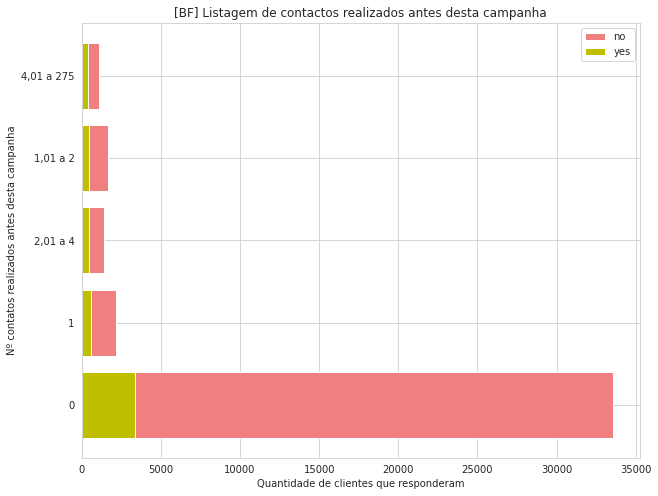

In [ ]:
nameColumn_name = ['0','1', '1,01 a 2', '2,01 a 4', '4,01 a 275']
nameColumn_name_2 = [[0, 0],[1, 1],[1.01, 2],[2.01, 4],[4.01, 275]]
dataset = dataset
column_name = 'previous'
ylabel = 'Nº contatos realizados antes desta campanha'
title = '[BF] Listagem de contactos realizados antes desta campanha'
color1 = 'lightcoral'
color2 = 'y'
xlabel = 'Quantidade de clientes que responderam'

graphics_bar_interval(nameColumn_name, nameColumn_name_2, column_name, dataset, xlabel, ylabel, title, color1, color2)

##Graphics Poutcome
1. Graphics Poutcome bankFull
2. Graphics Poutcome bankAdditionalFull

In [ ]:
b_poutcomeFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_poutcome, bankFullDatasetConvertion, 'poutcome')
b_poutcomeFull

,poutcome,poutcome_convertion,%no,%yes,%total
3,unknown,3,74.258477,7.489328,81.747805
2,success,2,1.178917,2.163190,3.342107
0,failure,0,9.473358,1.366924,10.840282
1,other,1,3.390768,0.679038,4.069806


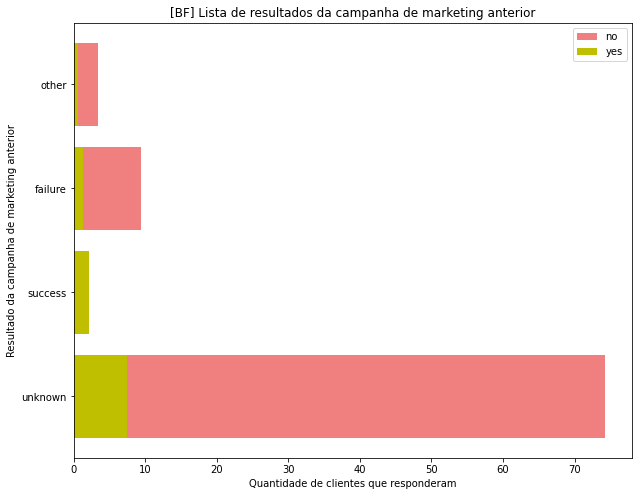

In [ ]:
graphics_bar_VLD(b_poutcomeFull, 'poutcome','%yes','%no', 'Quantidade de clientes que responderam', 'Resultado da campanha de marketing anterior', '[BF] Lista de resultados da campanha de marketing anterior', 'lightcoral', 'y')

##Graphics Y 
1. Graphics Y bankFull
2. Graphics Y bankAdditionalFull

In [ ]:
b_yFull = generate_table_percentage_by_yes_no_VLD_B(bank_full_y, bankFullDatasetConvertion, 'y')
b_yFull

,y,y_convertion,%no,%yes,%total
1,yes,1,0.00000,11.69848,11.69848
0,no,0,88.30152,0.00000,88.30152


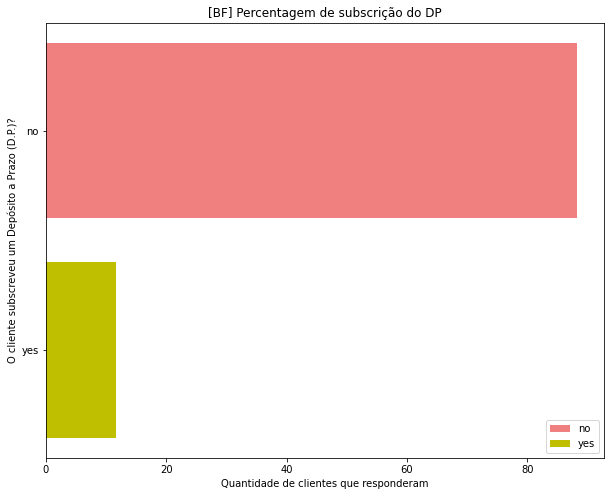

In [ ]:
graphics_bar_VLD(b_yFull, 'y','%yes','%no', 'Quantidade de clientes que responderam', 'O cliente subscreveu um Depósito a Prazo (D.P.)?', '[BF] Percentagem de subscrição do DP', 'lightcoral', 'y')

#Bivariate and Multivariate Analysis Charts - BankFull

##Average balance - Relationship between job and education (Heatmap)

In [ ]:
dataset = bankFullDatasetConvertion

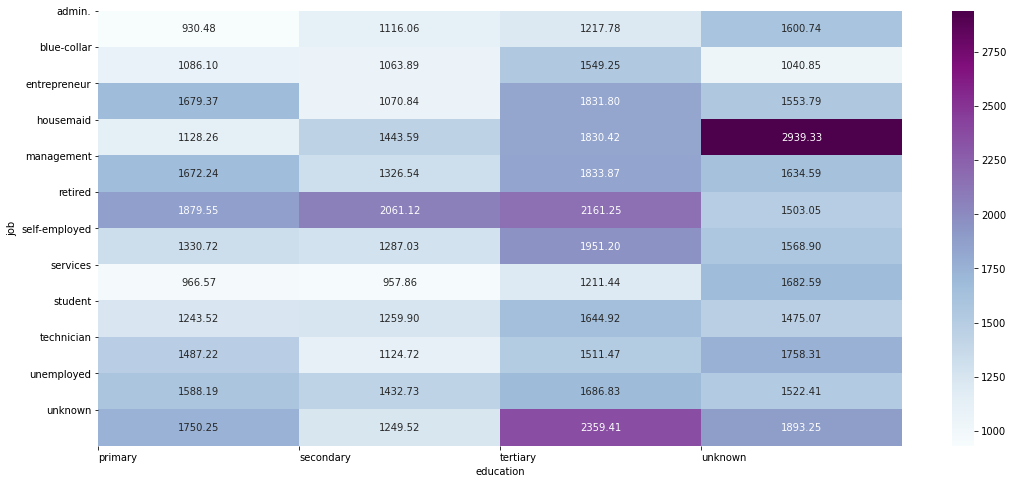

In [ ]:
mapacalor = dataset.pivot_table(values='balance', index="job",columns="education")
plt.figure(figsize=(18, 8))
sns.heatmap(mapacalor, annot=True,fmt='.2f',cmap="BuPu")

#Substituir no eixo dos y, os nº pela respetiva denominação
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed','services','student','technician','unemployed', 'unknown'], rotation = 0)

#Substituir no eixo dos x, os nº pela respetiva denominação
plt.xticks([0, 1, 2, 3], ['primary', 'secondary', 'tertiary', 'unknown'], rotation = 0, horizontalalignment="left")
plt.show()


In [ ]:
print('Uma vez que o balanço médio mais alto é encontrado no job "[3] housemaid" e na education "[3] unknown", ')
print('o grupo decidiu retirar os vários unknowns para obter resultados mais esclarecedores.')
print('Desse modo, apresentamos o seguinte gráfico:')

Uma vez que o balanço médio mais alto é encontrado no job "[3] housemaid" e na education "[3] unknown", 
o grupo decidiu retirar os vários unknowns para obter resultados mais esclarecedores.
Desse modo, apresentamos o seguinte gráfico:


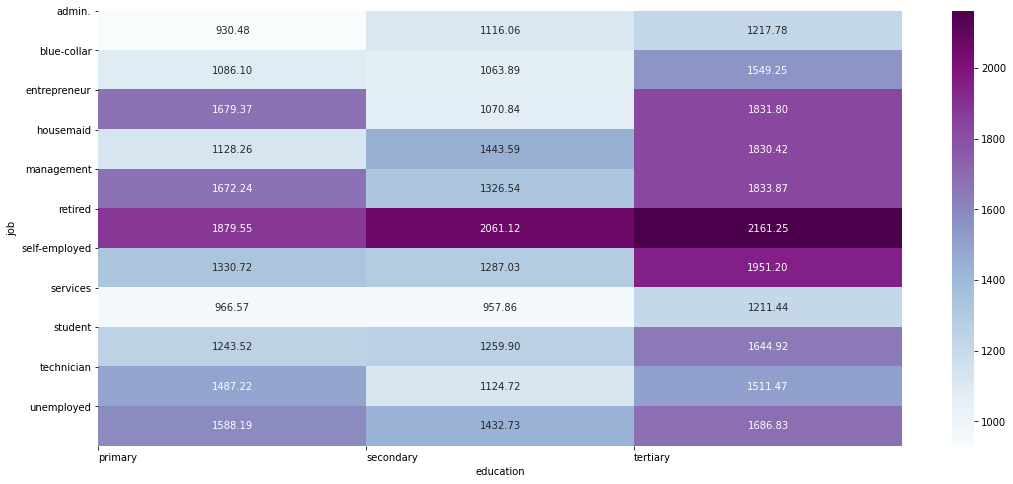

In [ ]:
dataset_t = dataset.loc[(dataset.education !=3 ) & (dataset.job !=11)]
mapacalor = dataset_t.pivot_table(values='balance', index="job",columns="education")
plt.figure(figsize=(18, 8))
sns.heatmap(mapacalor, annot=True,fmt='.2f',cmap="BuPu")

#Substituir no eixo dos y, os nº pela respetiva denominação
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed','services','student','technician','unemployed'], rotation = 0)

#Substituir no eixo dos x, os nº pela respetiva denominação
plt.xticks([0, 1, 2], ['primary', 'secondary', 'tertiary'], rotation = 0, horizontalalignment="left")
plt.show()


In [ ]:
print('Quando retirados os unknowns, é possível observar que o job "retired" (reformados) têm um balanço médio mais alto, o que seria expectável.')
print('Também é possível observar que a education "tertiary" (terciária) tem os balanços médios mais altos, o que se justifica uma vez que é')
print('expectável que um maior nível de educação corresponda a um salário mais alto, e portanto a um maior balanço. Finalmente, é possível verificar')
print('que o balanço médio mais baixo corresponde ao job "admin" com education "primary" (primária).')

Quando retirados os unknowns, é possível observar que o job "retired" (reformados) têm um balanço médio mais alto, o que seria expectável.
Também é possível observar que a education "tertiary" (terciária) tem os balanços médios mais altos, o que se justifica uma vez que é
expectável que um maior nível de educação corresponda a um salário mais alto, e portanto a um maior balanço. Finalmente, é possível verificar
que o balanço médio mais baixo corresponde ao job "admin" com education "primary" (primária).


##Average balance per job - Housing comparison

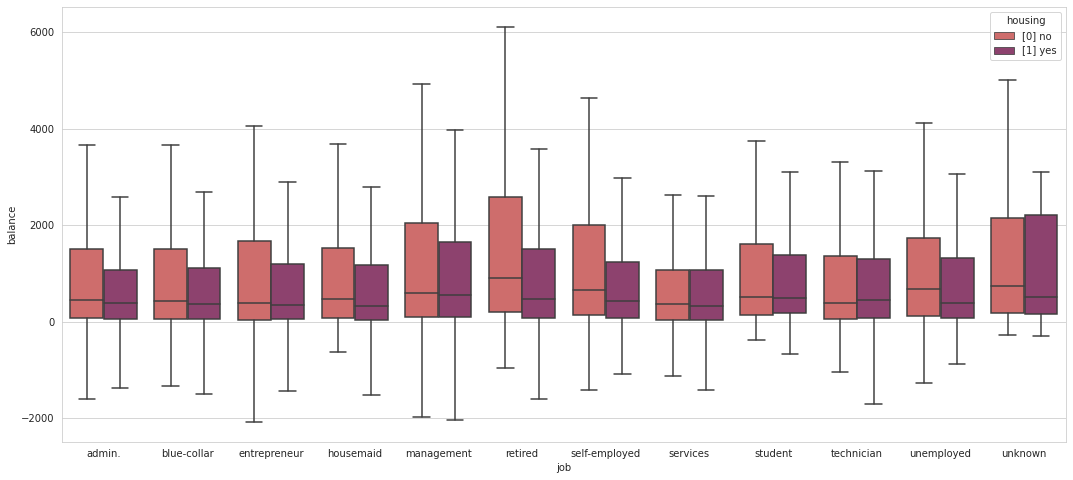

In [ ]:
##################################Atributos envolvidos: ‘2 – job’, ‘6 - balance’ e o ‘7 – housing’
plt.figure(figsize=(18, 8))
sns.set_style("whitegrid")
ax = sns.boxplot(x="job", y="balance", data=dataset, showfliers = False, 
                 hue ="housing", palette="flare")

#################Substituir no eixo dos x, os nº pela respetiva denominação
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed','services','student','technician','unemployed', 'unknown'])
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['[0] admin.', '[1] blue-collar', '[2] entrepreneur', '[3] housemaid', '[4] management', '[5] retired','[6] self-employed','[7] services','[8] student','[9] technician','[10] unemployed', '[11] unknown'])

#################Substituir os nº da legenda pelo respetivo nome
new_labels = ['[0] no', '[1] yes']
ax.legend(title="housing")
n = 0
for i in new_labels:
    ax.legend_.texts[n].set_text(i)
    n += 1


In [ ]:
print('Neste gráfico é possível observar que em todos os jobs apresentados, as pessoas que não têm empréstimos da casa, ')
print('têm sempre um maior balanço médio do que aqueles que têm empréstimos da casa.')
print('Esta situação repete-se para outros atributos, como por exemplo o loan (empréstimos).')
print('Que se encontramnos gráficos abaixo.')

Neste gráfico é possível observar que em todos os jobs apresentados, as pessoas que não têm empréstimos da casa, 
têm sempre um maior balanço médio do que aqueles que têm empréstimos da casa.
Esta situação repete-se para outros atributos, como por exemplo o loan (empréstimos).
Que se encontramnos gráficos abaixo.


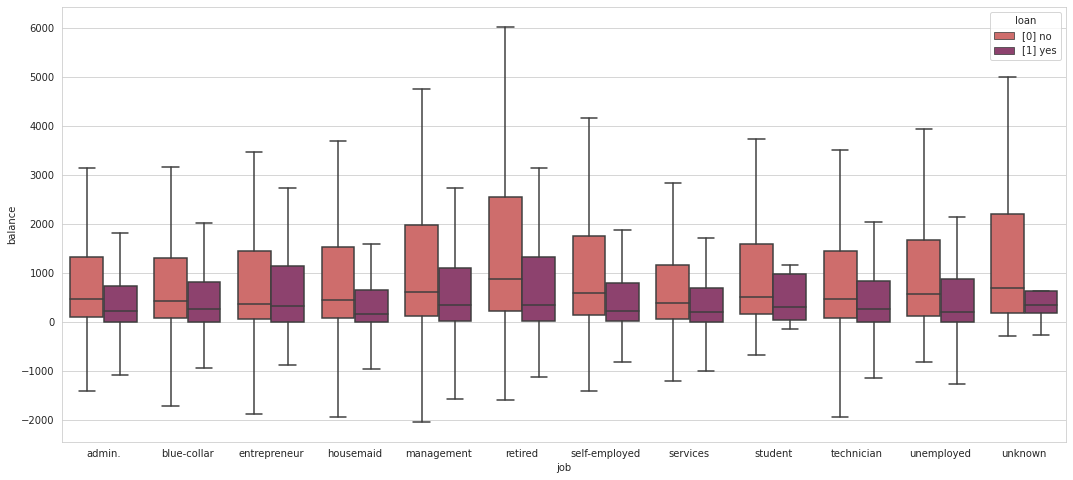

In [ ]:
##################################Atributos envolvidos: ‘2 – job’, ‘6 - balance’ e o ‘8 - loan’

atributo3 = 'loan'
plt.figure(figsize=(18, 8))
sns.set_style("whitegrid")
ax = sns.boxplot(x="job", y="balance", data=dataset, showfliers = False, 
                 hue =atributo3, palette="flare")

#################Substituir no eixo dos x, os nº pela respetiva denominação
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed','services','student','technician','unemployed', 'unknown'])

#################Substituir os nº da legenda pelo respetivo nome
new_labels = ['[0] no', '[1] yes']
ax.legend(title=atributo3)
n = 0
for i in new_labels:
    ax.legend_.texts[n].set_text(i)
    n += 1


In [ ]:
print('Neste gráfico é possível observar que em todos os jobs apresentados, as pessoas que não têm um empréstimo pessoal, ')
print('têm sempre um maior balanço médio do que aqueles que o têm.')

Neste gráfico é possível observar que em todos os jobs apresentados, as pessoas que não têm um empréstimo pessoal, 
têm sempre um maior balanço médio do que aqueles que o têm.


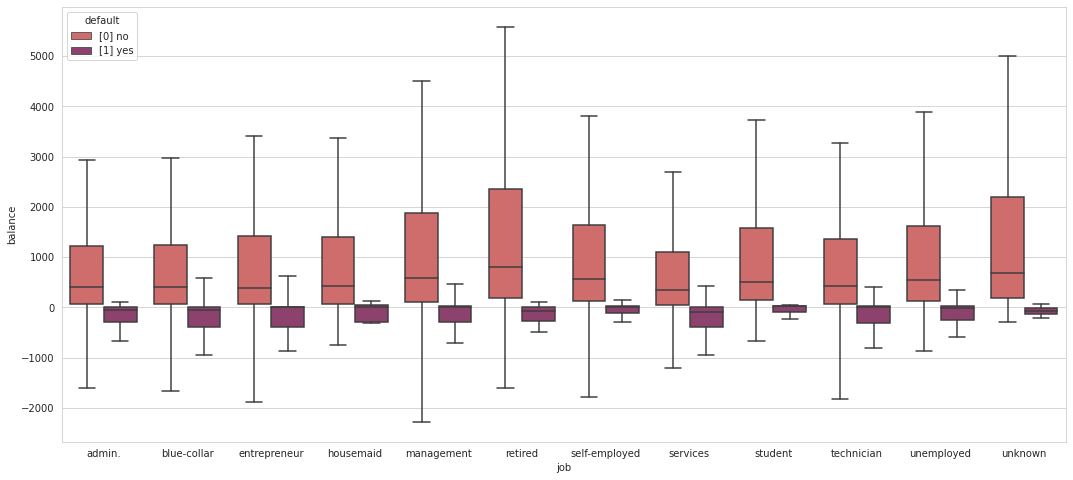

In [ ]:
##################################Atributos envolvidos: ‘2 – job’, ‘6 - balance’ e o ‘5 - default’

atributo3 = 'default'
plt.figure(figsize=(18, 8))
sns.set_style("whitegrid")
ax = sns.boxplot(x="job", y="balance", data=dataset, showfliers = False, 
                 hue =atributo3, palette="flare")

#################Substituir no eixo dos x, os nº pela respetiva denominação
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed','services','student','technician','unemployed', 'unknown'])

#################Substituir os nº da legenda pelo respetivo nome
new_labels = ['[0] no', '[1] yes']
ax.legend(title=atributo3)
n = 0
for i in new_labels:
    ax.legend_.texts[n].set_text(i)
    n += 1


In [ ]:
print('Neste gráfico é possível observar que em todos os jobs apresentados, as pessoas que não têm registo de um crédito em atraso, ')
print('têm sempre um maior balanço médio do que aquelas que o têm.')

Neste gráfico é possível observar que em todos os jobs apresentados, as pessoas que não têm registo de um crédito em atraso, 
têm sempre um maior balanço médio do que aquelas que o têm.


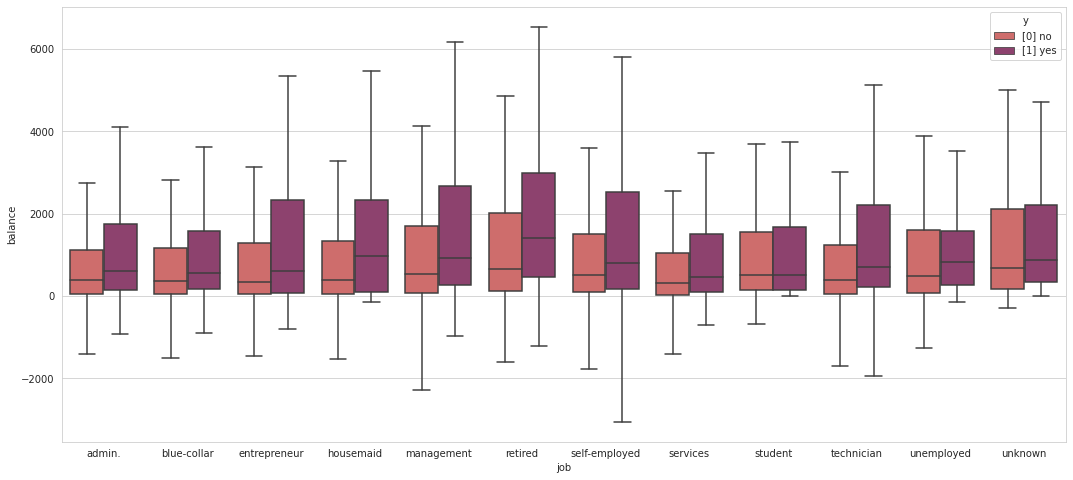

In [ ]:
##################################Atributos envolvidos: ‘2 – job’, ‘6 - balance’ e o ‘17 - y’

atributo3 = 'y'
plt.figure(figsize=(18, 8))
sns.set_style("whitegrid")
ax = sns.boxplot(x="job", y="balance", data=dataset, showfliers = False, 
                 hue =atributo3, palette="flare")

#################Substituir no eixo dos x, os nº pela respetiva denominação
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed','services','student','technician','unemployed', 'unknown'])

#################Substituir os nº da legenda pelo respetivo nome
new_labels = ['[0] no', '[1] yes']
ax.legend(title=atributo3)
n = 0
for i in new_labels:
    ax.legend_.texts[n].set_text(i)
    n += 1


In [ ]:
print('Neste gráfico é possível observar que em todos os jobs apresentados, as pessoas que responderam "Yes", ')
print('quando questionadas se gostariam de subscrever um D.P., têm sempre um maior balanço médio do que as que responderam "No".')

Neste gráfico é possível observar que em todos os jobs apresentados, as pessoas que responderam "Yes", 
quando questionadas se gostariam de subscrever um D.P., têm sempre um maior balanço médio do que as que responderam "No".


##Job distribution by age

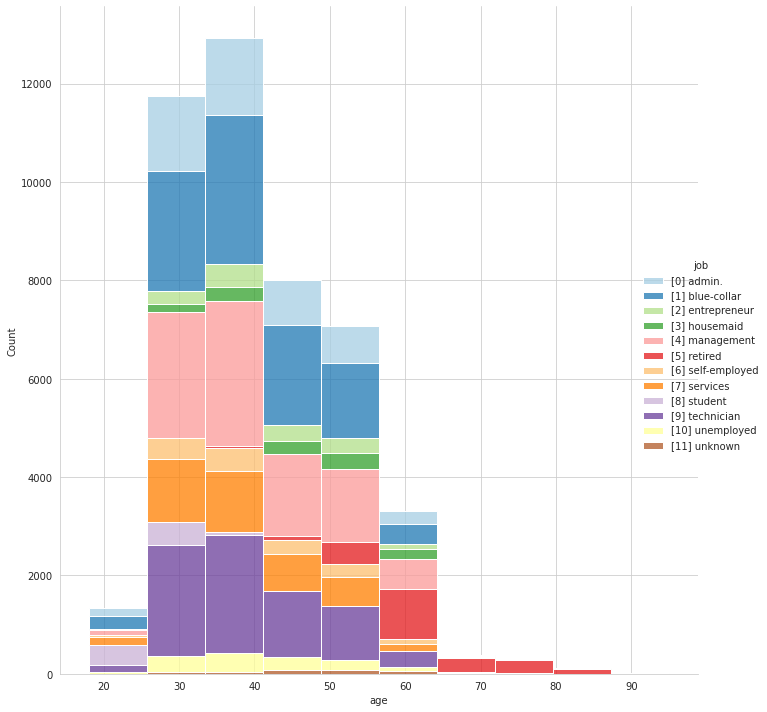

In [ ]:
t = sns.displot(data=dataset,
            x="age",
            hue="job",
            multiple="stack",
            #palette ="Set2",
            palette ="Paired",
            bins=10,
            height=10,
           )
new_labels = ['[0] admin.', '[1] blue-collar', '[2] entrepreneur', '[3] housemaid', '[4] management', '[5] retired','[6] self-employed','[7] services','[8] student','[9] technician','[10] unemployed', '[11] unknown']
for g, l in zip(t._legend.texts, new_labels): g.set_text(l)

##Relationship between poutcome and acceptance, or not, of term deposit

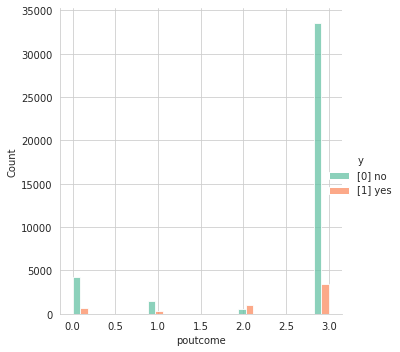

In [ ]:
t = sns.displot(data=dataset,
            x="poutcome",
            hue="y",
            multiple="dodge",
            #col = "poutcome",
            palette ="Set2",
            stat="count",
           )
new_labels = ['[0] no', '[1] yes']
for g, l in zip(t._legend.texts, new_labels): g.set_text(l)

In [ ]:
print('Dado que existe uma grande quantidade de unknown, decidimos retirar ')
print('para melhor compreensão das restantes variáveis.')

Dado que existe uma grande quantidade de unknown, decidimos retirar 
para melhor compreensão das restantes variáveis.


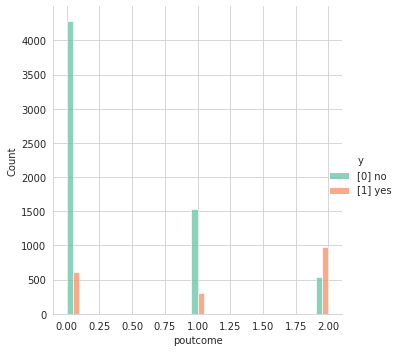

In [ ]:
dataset_poutcome = dataset.loc[ (dataset.poutcome != 3)]
t = sns.displot(data=dataset_poutcome,
            x="poutcome",
            hue="y",
            multiple="dodge",
            palette ="Set2",
            stat="count",
           )
new_labels = ['[0] no', '[1] yes']
for g, l in zip(t._legend.texts, new_labels): g.set_text(l)

In [ ]:
print('Quando o poutcome é "sucess", a probabilidade de o cliente fazer um depósito é quase o dobro.')

Quando o poutcome é "sucess", a probabilidade de o cliente fazer um depósito é quase o dobro.


##Duration and Campaign

De 0 a 200 segundos a percentagem de Yes é 3.57%.
 De 200 a 600 segundos a percentagem de Yes é 15.52%.
 De 600 a 1000 segundos a percentagem de Yes é 43.96%.
 A partir de 1000 segundos a percentagem de Yes é 59.74%.



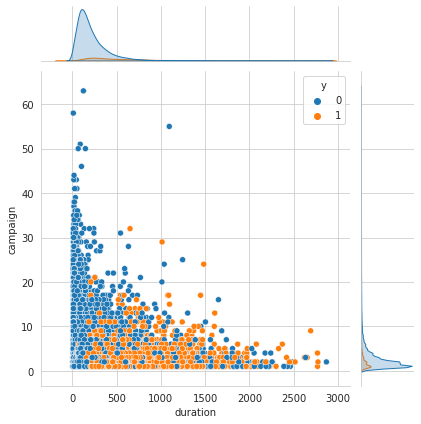

In [ ]:
dataset_duration = dataset.loc[(dataset.duration != 0 ) & (dataset.duration <= 3000)]
h = sns.jointplot(data=dataset_duration,
              x="duration", 
              y="campaign",
              hue="y")

dataset_duration2 = dataset.loc[(dataset.duration != 0 ) & (dataset.duration <= 200)]
r0 = ((dataset_duration2["y"]==1).mean())*100
dataset_duration2 = dataset.loc[(dataset.duration != 0 ) & (dataset.duration > 200) & (dataset.duration <= 600)]
r200 = ((dataset_duration2["y"]==1).mean())*100
dataset_duration2 = dataset.loc[(dataset.duration != 0 ) & (dataset.duration > 600) & (dataset.duration <= 1000)]
r600 = ((dataset_duration2["y"]==1).mean())*100
dataset_duration2 = dataset.loc[(dataset.duration != 0 ) & (dataset.duration >1000)]
r1000 = ((dataset_duration2["y"]==1).mean())*100 

t="De 0 a 200 segundos a percentagem de Yes é %.2f%%.\n"% r0
p="De 200 a 600 segundos a percentagem de Yes é %.2f%%.\n"% r200
o="De 600 a 1000 segundos a percentagem de Yes é %.2f%%.\n"% r600
q="A partir de 1000 segundos a percentagem de Yes é %.2f%%.\n"% r1000
print(t,p,o,q)

In [ ]:
print('O gráfico apresentado foi pensado para procurar a relação entre o número de campanhas feitas e a duração das chamadas.')
print('Foi possível observar que o número elevado de campanhas reflete-se numa curta duração de chamada, ')
print('e um menor número de campanhas numa maior duração. ')
print('Aliado a estes dados, o grupo decidiu ver a subscrição dos depósitos. ')
print('Chegou à conclusão de que, chamadas de curta duração têm quase sempre asssociado a elas uma variável y igual a "no".')
print('E que a percetagem de "yes" vai sendo cada vez maior ao longo da duração, como é possível ver no gráfico acima.')

O gráfico apresentado foi pensado para procurar a relação entre o número de campanhas feitas e a duração das chamadas.
Foi possível observar que o número elevado de campanhas reflete-se numa curta duração de chamada, 
e um menor número de campanhas numa maior duração. 
Aliado a estes dados, o grupo decidiu ver a subscrição dos depósitos. 
Chegou à conclusão de que, chamadas de curta duração têm quase sempre asssociado a elas uma variável y igual a "no".
E que a percetagem de "yes" vai sendo cada vez maior ao longo da duração, como é possível ver no gráfico acima.


#Convertion on BankFull - 2º Type of Convertion
[Referência - datacamp.com](https://www.datacamp.com/community/tutorials/categorical-data)
> A estratégia básica é *converter cada valor de categoria em uma nova coluna* [1] e *atribuir um valor 1 ou 0 (Verdadeiro / Falso) à coluna* [2]. Isso tem a vantagem de não ponderar um valor indevidamente.
 A função do pandas **.get_dummies()** é nomeada desta forma porque cria variáveis ​​fictícias / indicadoras (1 ou 0). 

###[0] Read datasets

In [34]:
bankFullDataset = pd.read_csv('/content/drive/MyDrive/SINO/2. Data Sets/0. Original_bank/bank-full.csv' , sep = ';')
bankFullDatasetConvertion = pd.read_csv('/content/drive/MyDrive/SINO/2. Data Sets/1.1. 1ª Conversão/bankFullConvertion.csv' , sep = ',')

###[1] Technique One-Hot
Existem principalmente três argumentos importantes aqui, o primeiro é o DataFrame que você deseja codificar, o segundo sendo o columns_argumento que permite especificar as colunas que deseja codificar e, terceiro, o prefix_argumento que permite especificar o prefixo para o novas colunas que serão criadas após a codificação.



In [35]:
bankFull_convertion = bankFullDataset.copy()
bankFull_convertion

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [36]:
bankFull_convertion['marital'] = bankFull_convertion['marital'].astype('category')
bankFull_convertion['education'] = bankFull_convertion['education'].astype('category')
bankFull_convertion['job'] = bankFull_convertion['job'].astype('category')
bankFull_convertion['contact'] = bankFull_convertion['contact'].astype('category')
bankFull_convertion['poutcome'] = bankFull_convertion['poutcome'].astype('category')
bankFull_convertion = pd.get_dummies(bankFull_convertion, columns=['marital'], prefix = ['marital'])
bankFull_convertion = pd.get_dummies(bankFull_convertion, columns=['education'], prefix = ['education'])
bankFull_convertion = pd.get_dummies(bankFull_convertion, columns=['job'], prefix = ['job'])
bankFull_convertion = pd.get_dummies(bankFull_convertion, columns=['contact'], prefix = ['contact'])
bankFull_convertion = pd.get_dummies(bankFull_convertion, columns=['poutcome'], prefix = ['poutcome'])
bankFull_convertion.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


###[2] Technique Replacing values
[Referência - datacamp.com](https://www.datacamp.com/community/tutorials/categorical-data)
> A ideia é que você tenha a liberdade de escolher os números que deseja atribuir às categorias de acordo com o caso de uso de negócios.


#### default

In [37]:
convert_bank_full_default = list(bank_full_default.loc[0:, 'default'])
for index, row in bankFull_convertion.iterrows():
  if(row['default'] == convert_bank_full_default[0]):
    bankFull_convertion.loc[index, 'default'] = "0"
  elif(row['default'] == convert_bank_full_default[1]):
    bankFull_convertion.loc[index, 'default'] = "1"

bankFull_convertion['default'] = bankFull_convertion['default'].astype(str).astype(int)

#### hosing

In [38]:
for index, row in bankFull_convertion.iterrows():
  if(row['housing'] == "no"):
    bankFull_convertion.loc[index, 'housing'] = "0"
  elif(row['housing'] == "yes"):
    bankFull_convertion.loc[index, 'housing'] = "1"

bankFull_convertion['housing'] = bankFull_convertion['housing'].astype(str).astype(int)

####loan

In [39]:
for index, row in bankFull_convertion.iterrows():
  if(row['loan'] == "no"):
    bankFull_convertion.loc[index, 'loan'] = "0"
  elif(row['loan'] == "yes"):
    bankFull_convertion.loc[index, 'loan'] = "1"

bankFull_convertion['loan'] = bankFull_convertion['loan'].astype(str).astype(int)

#### month

In [40]:
convert_bank_full_month = list(bank_full_month.loc[0:, 'month'])
for index, row in bankFull_convertion.iterrows():
  if(row['month'] == convert_bank_full_month[0]):
    bankFull_convertion.loc[index, 'month'] = "0"
  elif(row['month'] == convert_bank_full_month[1]):
    bankFull_convertion.loc[index, 'month'] = "1"
  elif(row['month'] == convert_bank_full_month[2]):
    bankFull_convertion.loc[index, 'month'] = "2"
  elif(row['month'] == convert_bank_full_month[3]):
    bankFull_convertion.loc[index, 'month'] = "3"
  elif(row['month'] == convert_bank_full_month[4]):
    bankFull_convertion.loc[index, 'month'] = "4"
  elif(row['month'] == convert_bank_full_month[5]):
    bankFull_convertion.loc[index, 'month'] = "5"
  elif(row['month'] == convert_bank_full_month[6]):
    bankFull_convertion.loc[index, 'month'] = "6"
  elif(row['month'] == convert_bank_full_month[7]):
    bankFull_convertion.loc[index, 'month'] = "7"
  elif(row['month'] == convert_bank_full_month[8]):
    bankFull_convertion.loc[index, 'month'] = "8"
  elif(row['month'] == convert_bank_full_month[9]):
    bankFull_convertion.loc[index, 'month'] = "9"
  elif(row['month'] == convert_bank_full_month[10]):
    bankFull_convertion.loc[index, 'month'] = "10"
  elif(row['month'] == convert_bank_full_month[11]):
    bankFull_convertion.loc[index, 'month'] = "11"

bankFull_convertion['month'] = bankFull_convertion['month'].astype(str).astype(int)

#### Y

In [41]:
for index, row in bankFull_convertion.iterrows():
  if(row['y'] == "no"):
    bankFull_convertion.loc[index, 'y'] = "0"
  elif(row['y'] == "yes"):
    bankFull_convertion.loc[index, 'y'] = "1"
  
bankFull_convertion['y'] = bankFull_convertion['y'].astype(str).astype(int)

### Result of 2º Type of Convertion on BankFull
Para as diversas análisesque se seguem (univariáveis, bivariáveies e multivariáveis) vamos utilizar o ficheiro que sai do 2º tipo de conversão. 
Uma vez só com esse, é que conseguimos garantir que não há diferenciação de pesos entre as diversas opções possíveis para um determinado atributo. 
Isto é, por exemplo no atributo 'education', temos como possibilidades o seguinte: 
1.   primary
2.   secondary
3.   tertiary
4.   unknown

O facto do cliente responder a opção '1.' ou a '4.', para a decisão que está em causa é indiferente. E isso só está garantido no 2º tipo de conversão.

In [42]:
bankFull_convertion

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,8,261,1,-1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,8,151,1,-1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,8,76,1,-1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,8,92,1,-1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,8,198,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,9,977,3,-1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,9,456,2,-1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,9,1127,5,184,3,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,9,508,4,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


#Clustering using K-Means technique
[Referência - datacamp.com](https://www.datacamp.com/community/tutorials/k-means-clustering-python)
> Clustering é a tarefa de agrupar um conjunto de objetos de forma que os objetos no mesmo cluster sejam mais semelhantes entre si do que os objetos em outros clusters. Similaridade é uma métrica que reflete a força do relacionamento entre dois objetos de dados. O clustering é usado principalmente para mineração de dados exploratória. Ele tem uso múltiplo em muitos campos, como aprendizado de máquina, reconhecimento de padrões, análise de imagens, recuperação de informações, bioinformática, compressão de dados e computação gráfica.

>No entanto, este post tenta desvendar o funcionamento interno do K-Means, uma técnica de agrupamento muito popular. Também há uma postagem muito boa do DataCamp sobre K-Means, que explica os tipos de clustering (hard e soft clustering), tipos de métodos de clustering (conectividade, centróide, distribuição e densidade) com um estudo de caso. O algoritmo o ajudará a lidar com conjuntos de dados não rotulados (ou seja, os conjuntos de dados que não possuem rótulos de classe) e extrair suas próprias inferências deles com facilidade.

>K-Means se enquadra na categoria de agrupamento baseado em centróide. Um centróide é um ponto de dados (imaginário ou real) no centro de um cluster. No agrupamento baseado em centróide, os clusters são representados por um vetor central ou um centróide. Este centróide pode não ser necessariamente um membro do conjunto de dados. O agrupamento baseado em centróide é um algoritmo iterativo no qual a noção de similaridade é derivada pela proximidade de um ponto de dados do centróide do agrupamento.



In [43]:
cluster_without_unknown_bool_1 = False
cluster_without_unknown_bool_2 = False

In [44]:
cluster_number = 3

**Observação:** O grupo testou várias combinações possíveis (quantity_cluster igual a por ex. a 4, 8, 6, ...). E dos números de clusters pedidos/testadas o que obtivemos melhores resultados foi para o 3. Por isso, o grupo decidiu avançar com esse valor como pressuposto para a elaboração de todos os clusters neste ponto.

##Clustering With Unknown



In [45]:
bankFull_convertion_with_unknown = bankFull_convertion.copy()
bankFull_convertion_with_unknown

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,8,261,1,-1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,8,151,1,-1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,8,76,1,-1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,8,92,1,-1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,8,198,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,9,977,3,-1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,9,456,2,-1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,9,1127,5,184,3,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,9,508,4,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


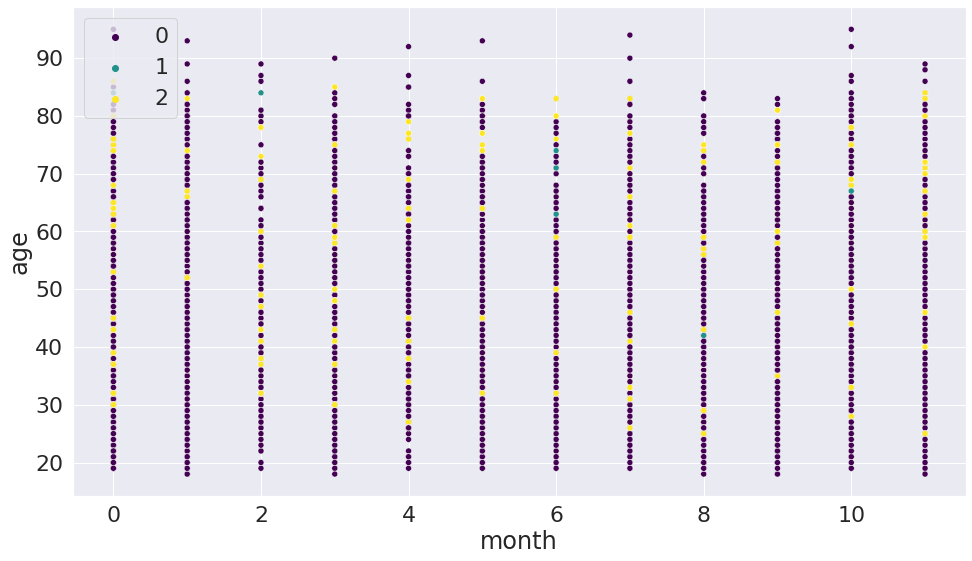

In [46]:
kmeans = KMeans(n_clusters=cluster_number, random_state=0)
kmeans.fit(bankFull_convertion_with_unknown)
kmeans.labels_

plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.scatterplot(x='month',y='age',data=bankFull_convertion_with_unknown, hue=kmeans.labels_, palette='viridis')

In [47]:
labels = pd.DataFrame(list(kmeans.labels_))
labels.index = range(labels.shape[0])
labels.columns = ['clustering']
labels_with_unknown = labels['clustering']
labels['clustering'].astype(str).astype(int)
bankFull_convertion_with_unknown['clustering'] = labels['clustering']
bankFull_convertion_with_unknown

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,clustering
0,58,0,2143,1,0,5,8,261,1,-1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,44,0,29,1,0,5,8,151,1,-1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,33,0,2,1,1,5,8,76,1,-1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,47,0,1506,1,0,5,8,92,1,-1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,33,0,1,0,0,5,8,198,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,9,977,3,-1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
45207,71,0,1729,0,0,17,9,456,2,-1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
45208,72,0,5715,0,0,17,9,1127,5,184,3,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,2
45209,57,0,668,0,0,17,9,508,4,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [48]:
r = list(range(cluster_number))
yes = []
no = []
for z in r:
   x = bankFull_convertion_with_unknown.query('clustering == ' + str(r[z]) + ' and y == 1')
   yes.append(x.shape[0])
   x = bankFull_convertion_with_unknown.query('clustering == ' + str(r[z]) + ' and y == 0')
   no.append(x.shape[0])
print(yes)
print(no)

[4538, 40, 711]
[36025, 269, 3628]


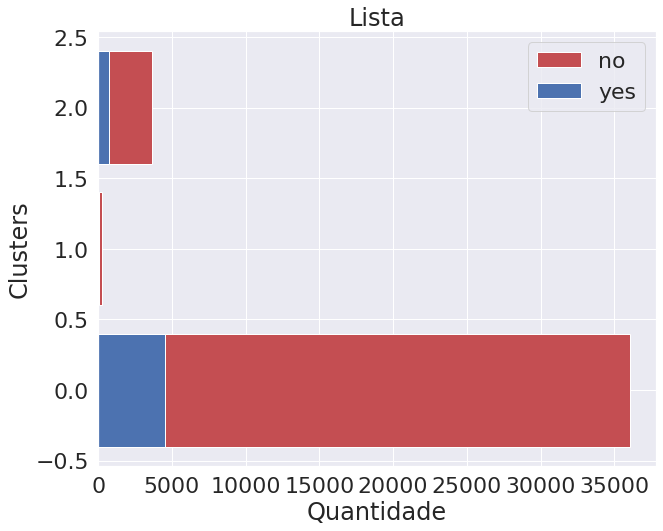

In [49]:
x = np.array(r)
y = np.array(no)

x1 = np.array(r)
y2 = np.array(yes)

plt.figure(figsize=(10,8))
plt.xlabel('Quantidade') 
plt.ylabel('Clusters') 
plt.title('Lista')
plt.barh(x, y, label = 'no', color = 'r')
plt.barh(x1, y2, label = 'yes', color = 'b')
plt.legend()
plt.show()

##Clustering Without Unknown

*   Remove unknown
*   Clustering



###remove unknown (education, job)

In [50]:
bankFull_convertion_without_unknown = bankFull_convertion.copy()
bankFull_convertion_without_unknown.shape[0]

45211

In [51]:
bankFull_convertion_without_unknown = bankFull_convertion_without_unknown.query('job_unknown != 1')
bankFull_convertion_without_unknown = bankFull_convertion_without_unknown.query('education_unknown != 1')
bankFull_convertion_without_unknown.shape[0]

43193

In [52]:
bankFull_convertion_without_unknown = bankFull_convertion_without_unknown.drop(columns='education_unknown')
bankFull_convertion_without_unknown = bankFull_convertion_without_unknown.drop(columns='job_unknown')
bankFull_convertion_without_unknown.index = range(bankFull_convertion_without_unknown.shape[0])
bankFull_convertion_without_unknown

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,8,261,1,-1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,8,151,1,-1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,8,76,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,35,0,231,1,0,5,8,139,1,-1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,28,0,447,1,1,5,8,217,1,-1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,0,825,0,0,17,9,977,3,-1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
43189,71,0,1729,0,0,17,9,456,2,-1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
43190,72,0,5715,0,0,17,9,1127,5,184,3,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
43191,57,0,668,0,0,17,9,508,4,-1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


###clustering


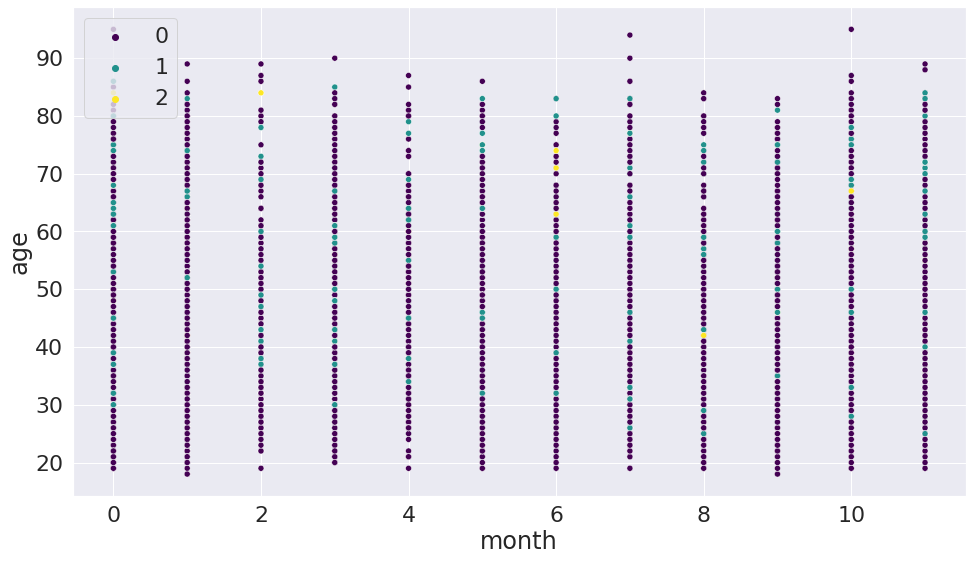

In [53]:
kmeans = KMeans(n_clusters=cluster_number, random_state=0)
kmeans.fit(bankFull_convertion_without_unknown)
kmeans.labels_

plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.scatterplot(x='month',y='age',data=bankFull_convertion_without_unknown, hue=kmeans.labels_, palette='viridis')

In [54]:
labels = pd.DataFrame(list(kmeans.labels_))
labels_without_unknown = kmeans.labels_
labels.index = range(labels.shape[0])
labels.columns = ['clustering']
labels_without_unknown = labels['clustering']
labels['clustering'].astype(str).astype(int)
bankFull_convertion_without_unknown['clustering'] = labels['clustering']
bankFull_convertion_without_unknown

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,clustering
0,58,0,2143,1,0,5,8,261,1,-1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,44,0,29,1,0,5,8,151,1,-1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,33,0,2,1,1,5,8,76,1,-1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,35,0,231,1,0,5,8,139,1,-1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,28,0,447,1,1,5,8,217,1,-1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,0,825,0,0,17,9,977,3,-1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
43189,71,0,1729,0,0,17,9,456,2,-1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
43190,72,0,5715,0,0,17,9,1127,5,184,3,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
43191,57,0,668,0,0,17,9,508,4,-1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [55]:
r = list(range(cluster_number))
yes = []
no = []
for z in r:
   x = bankFull_convertion_without_unknown.query('clustering == ' + str(r[z]) + ' and y == 1')
   yes.append(x.shape[0])
   x = bankFull_convertion_without_unknown.query('clustering == ' + str(r[z]) + ' and y == 0')
   no.append(x.shape[0])
print(yes)
print(no)

[4313, 671, 37]
[34457, 3456, 259]


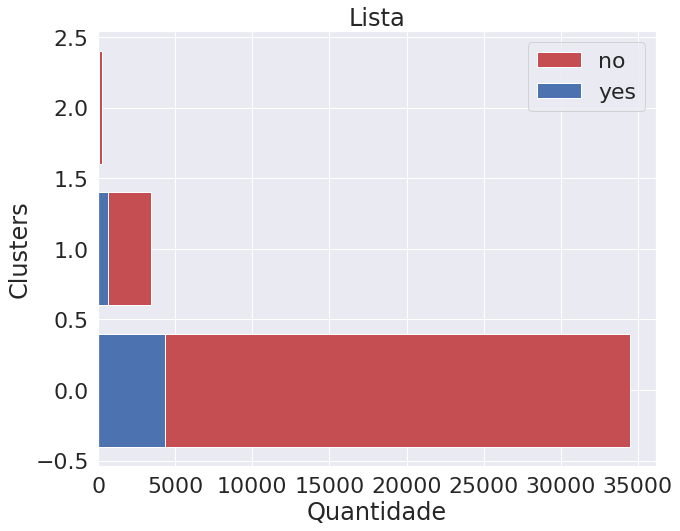

In [56]:
x = np.array(r)
y = np.array(no)

x1 = np.array(r)
y2 = np.array(yes)

plt.figure(figsize=(10,8))
plt.xlabel('Quantidade') 
plt.ylabel('Clusters') 
plt.title('Lista')
plt.barh(x, y, label = 'no', color = 'r')
plt.barh(x1, y2, label = 'yes', color = 'b')
plt.legend()
plt.show()

#Clusters table result

In [57]:
def cluster_table_result(df):
  _number = list(range(cluster_number))
  bankFull_convertion_with_unknown_table = pd.DataFrame()
  bankFull_convertion_with_unknown_table['Clustering'] = _number
  bankFull_convertion_with_unknown_table['%y=no'] = _number
  bankFull_convertion_with_unknown_table['%y=yes'] = _number
  bankFull_convertion_with_unknown_table['Total clustering'] = _number
  for index, row in bankFull_convertion_with_unknown_table.iterrows(): 
    total_bankFull_convertion_with_unknown = df.query('clustering == ' + str(_number[index])).shape[0] 
    yes_bankFull_convertion_with_unknown = df.query('y == 1 and ' + 'clustering == ' + str(_number[index])).shape[0] * 100 / total_bankFull_convertion_with_unknown
    no_bankFull_convertion_with_unknown = df.query('y == 0 and ' + 'clustering == ' + str(_number[index])).shape[0] * 100 / total_bankFull_convertion_with_unknown
    bankFull_convertion_with_unknown_table.loc[index, '%y=yes'] = yes_bankFull_convertion_with_unknown
    bankFull_convertion_with_unknown_table.loc[index, '%y=no'] = no_bankFull_convertion_with_unknown
    bankFull_convertion_with_unknown_table.loc[index, 'Total clustering'] = (total_bankFull_convertion_with_unknown)
    bankFull_convertion_with_unknown_table = bankFull_convertion_with_unknown_table.rename(columns={'clustering' : 'Nº de Clusters'})
  return bankFull_convertion_with_unknown_table

In [58]:
with_inknown = cluster_table_result(bankFull_convertion_with_unknown)
with_inknown

,Clustering,%y=no,%y=yes,Total clustering
0,0,88.812465,11.187535,40563
1,1,87.055016,12.944984,309
2,2,83.613736,16.386264,4339


In [59]:
without_inknown = cluster_table_result(bankFull_convertion_without_unknown)
without_inknown

,Clustering,%y=no,%y=yes,Total clustering
0,0,88.875419,11.124581,38770
1,1,83.741216,16.258784,4127
2,2,87.500000,12.500000,296


#Assessing clustering
[Referência - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=metrics%20silhouette_score)
> Vamos **avaliar o resultado obtido** com a técnica utilizada, pra isso vamos calcular o coeficiente de silhueta médio de todas as amostras. O Coeficiente Silhouette é calculado usando a distância média intra-cluster ( a) e a distância média do cluster mais próximo ( b) para cada amostra. O coeficiente de silhueta para uma amostra é . Para esclarecer, é a distância entre uma amostra e o cluster mais próximo do qual a amostra não faz parte. Observe que o coeficiente da silhueta só é definido se o número de rótulos for .(b - a) / max(a, b)b2 <= n_labels <= n_samples - 1



###silhouette_score
[Referência - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=metrics%20silhouette_score)
> Calcule o coeficiente de silhueta médio de todas as amostras. O Coeficiente Silhouette é calculado usando a distância média intra-cluster ( a) e a distância média do cluster mais próximo ( b) para cada amostra. O coeficiente de silhueta para uma amostra é . Para esclarecer, é a distância entre uma amostra e o cluster mais próximo do qual a amostra não faz parte. Observe que o coeficiente da silhueta só é definido se o número de rótulos for .(b - a) / max(a, b)b2 <= n_labels <= n_samples - 1

####With 'Unknown'

In [60]:
silhouette = metrics.silhouette_score(bankFull_convertion_with_unknown,labels_with_unknown, metric='euclidean')

####Without 'Unknown'

In [61]:
silhouette = metrics.silhouette_score(bankFull_convertion_without_unknown,labels_without_unknown, metric='euclidean')

###davies_bouldin_score
[Referência-scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html?highlight=davies%20bouldin)

Calcula a pontuação Davies-Bouldin.

A pontuação é definida como a medida de similaridade média de cada cluster com seu cluster mais semelhante, onde a similaridade é a razão entre as distâncias dentro do cluster e entre as distâncias entre os cluster. Assim, os clusters mais distantes e menos dispersos resultarão em uma pontuação melhor.

A pontuação mínima é zero, com valores mais baixos indicando melhor agrupamento.

####With 'Unknown'

In [62]:
metrics.davies_bouldin_score(bankFull_convertion_without_unknown, kmeans.labels_)

0.5180952767845479

####Without 'Unknown'

In [63]:
metrics.davies_bouldin_score(bankFull_convertion_without_unknown, kmeans.labels_)

0.5180952767845479

###Both Metrics

####With 'Unknown'

In [64]:
import time

inicio = time.time()
silhouette = metrics.silhouette_score(bankFull_convertion_with_unknown,labels_with_unknown, metric='euclidean')
davies_bouldin = metrics.davies_bouldin_score(bankFull_convertion_with_unknown, labels_with_unknown)
fim = time.time()
print("Clusters' number: ", cluster_number)
print("Silhouette: ", silhouette)
print("Davies_bouldin: ", davies_bouldin)
print("Execution time: ", fim - inicio)

Clusters' number:  3
Silhouette:  0.7714286402953257
Davies_bouldin:  0.5205565226079106
Execution time:  42.83692955970764


####Without 'Unknown'

In [65]:
inicio = time.time()
silhouette = metrics.silhouette_score(bankFull_convertion_without_unknown,labels_without_unknown, metric='euclidean')
davies_bouldin = metrics.davies_bouldin_score(bankFull_convertion_without_unknown, labels_without_unknown)
fim = time.time()
print("Clusters' number: ", cluster_number)
print("Silhouette: ", silhouette)
print("Davies_bouldin: ", davies_bouldin)
print("Execution time: ", fim - inicio)

Clusters' number:  3
Silhouette:  0.7716091028744941
Davies_bouldin:  0.5180952767845479
Execution time:  38.085875511169434


#Discription profiles with dataset without 'Unknown'

In [66]:
def clustering_profiles(number, dataset, yes_no):
  clustering_profiles_table = dataset.copy()
  clustering_profiles_table = clustering_profiles_table.rename(columns={'job_admin.' : 'job_admin', 'job_blue-collar' : 'job_blue_collar', 'job_self-employed' : 'job_self_employed'})
  clustering_profiles_table = clustering_profiles_table.query('clustering == ' + str(number) + ' and y == ' + str(yes_no))
  clustering_profiles_table.index = range(clustering_profiles_table.shape[0])
  return clustering_profiles_table

In [67]:
clustering_discription_profiles = clustering_profiles(1, bankFull_convertion_without_unknown, 1)
clustering_discription_profiles

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,job_admin,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,job_technician,job_unemployed,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,clustering
0,28,0,5090,1,0,6,8,1297,3,-1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
1,35,0,3837,1,0,8,8,1084,1,-1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,52,0,3923,1,0,14,8,942,3,-1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,51,0,7180,1,0,14,8,927,1,-1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,41,0,5291,1,0,14,8,1423,3,-1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,63,0,3904,0,0,8,9,360,1,96,4,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
667,37,0,3556,0,0,9,9,268,1,-1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
668,60,0,4256,1,0,16,9,200,1,92,4,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
669,75,0,3810,1,0,16,9,262,1,183,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1


##Age


In [68]:
def x_clustering(dataset, clustering_number, x_max, x_min, column_name):
  aux_x_max = x_max +1
  all_values_x = []
  all_x = []
  array_x = []
  for i in range(x_min, aux_x_max):
    value_x = dataset.query('clustering == ' + str(clustering_number) + ' and ' + str(column_name) + ' == ' + str(i)).shape[0]
    if (value_x != 0):
      all_values_x.append(value_x)
      all_x.append(i)
  array_x = [all_x, all_values_x]
  return array_x

In [69]:
age = x_clustering(clustering_discription_profiles, 1, 30, 18, 'age')
age

[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
 [1, 1, 1, 1, 4, 9, 13, 20, 19, 10, 29]]

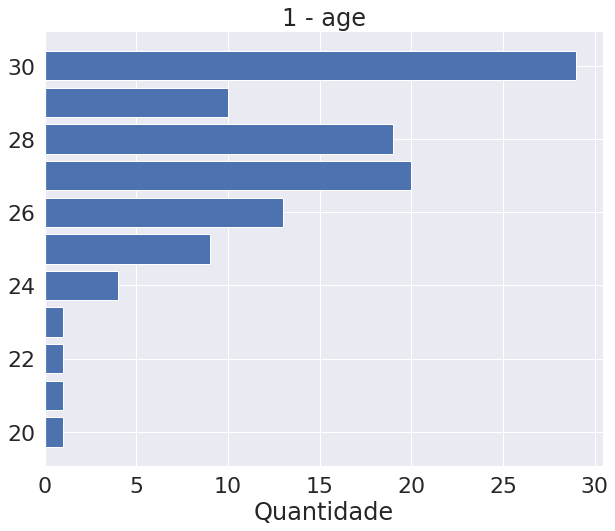

In [70]:
x = np.array(age[0])
y = np.array(age[1])

plt.figure(figsize=(10,8))
plt.xlabel('Quantidade') 
#plt.ylabel('coluna') 
plt.title('1 - age')
plt.barh(x, y, color = 'b')
plt.show()

##Job

In [71]:
clustering_profiles_job_admin = (clustering_discription_profiles.query('job_admin == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_admin	

11.177347242921014

In [72]:
clustering_profiles_job_blue_collar = (clustering_discription_profiles.query('job_blue_collar == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_blue_collar		

9.985096870342772

In [73]:
clustering_profiles_job_entrepreneur = (clustering_discription_profiles.query('job_entrepreneur == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_entrepreneur

1.9374068554396424

In [74]:
clustering_profiles_job_housemaid = (clustering_discription_profiles.query('job_housemaid == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_housemaid

2.235469448584203

In [75]:
clustering_profiles_job_management = (clustering_discription_profiles.query('job_management == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_management

31.445603576751118

In [76]:
clustering_profiles_job_retired = (clustering_discription_profiles.query('job_retired == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_retired

13.412816691505217

In [77]:
clustering_profiles_job_self_employed = (clustering_discription_profiles.query('job_self_employed == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_self_employed


3.427719821162444

In [78]:
clustering_profiles_job_services = (clustering_discription_profiles.query('job_services == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_services

4.321907600596125

In [79]:
clustering_profiles_job_student = (clustering_discription_profiles.query('job_student == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_student

3.7257824143070044

In [80]:
clustering_profiles_job_technician = (clustering_discription_profiles.query('job_technician == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_technician

15.946348733233979

In [81]:
clustering_profiles_job_unemployed = (clustering_discription_profiles.query('job_unemployed == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_job_unemployed

2.384500745156483

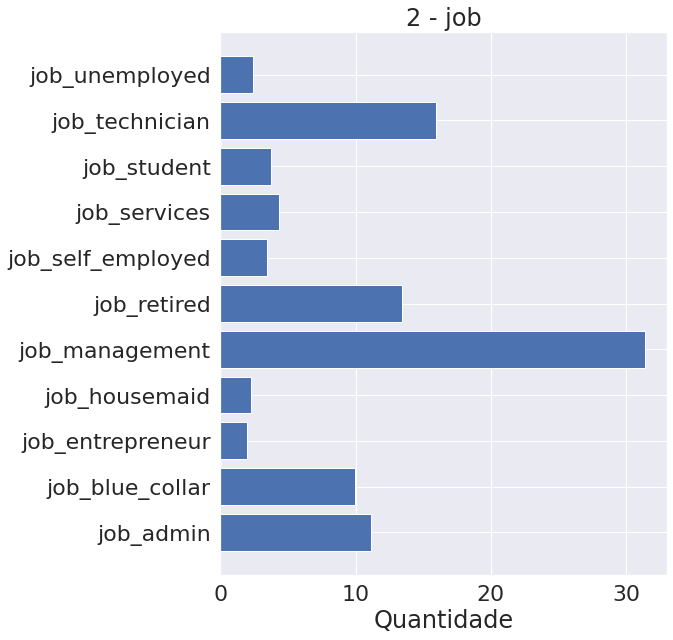

In [82]:
cluster_column_name = ['job_admin',	'job_blue_collar', 	'job_entrepreneur', 'job_housemaid',	'job_management',	'job_retired',	'job_self_employed',	'job_services',	'job_student',	'job_technician',	'job_unemployed']
cluster_column_value = [clustering_profiles_job_admin, clustering_profiles_job_blue_collar, clustering_profiles_job_entrepreneur, clustering_profiles_job_housemaid, clustering_profiles_job_management, clustering_profiles_job_retired, clustering_profiles_job_self_employed, clustering_profiles_job_services, clustering_profiles_job_student, clustering_profiles_job_technician, clustering_profiles_job_unemployed]

x = np.array(cluster_column_name)
y = np.array(cluster_column_value)

plt.figure(figsize=(8,10))
plt.xlabel('Quantidade') 
#plt.ylabel('coluna') 
plt.title('2 - job')
plt.barh(x, y, color = 'b')
plt.show()

##Marital

In [83]:
clustering_profiles_marital_divorced = (clustering_discription_profiles.query('marital_divorced == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_marital_divorced

10.283159463487332

In [84]:
clustering_profiles_marital_married = (clustering_discription_profiles.query('marital_married == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_marital_married

57.52608047690015

In [85]:
clustering_profiles_marital_single = (clustering_discription_profiles.query('marital_single == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_marital_single

32.19076005961252

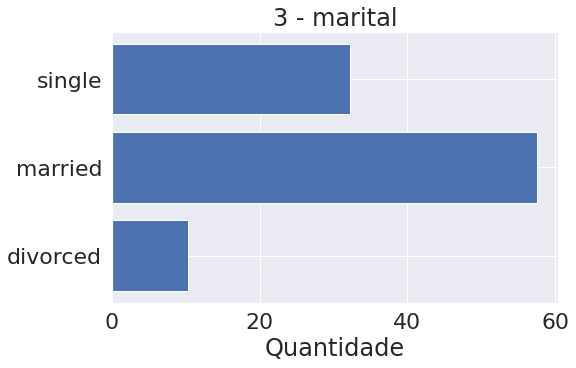

In [86]:
cluster_column_name = ['divorced', 'married', 'single']
cluster_column_value = [clustering_profiles_marital_divorced, clustering_profiles_marital_married, clustering_profiles_marital_single]

x = np.array(cluster_column_name)
y = np.array(cluster_column_value)

plt.figure(figsize=(8,5))
plt.xlabel('Quantidade') 
#plt.ylabel('coluna') 
plt.title('3 - marital')
plt.barh(x, y, color = 'b')
plt.show()

##Education

In [87]:
clustering_profiles_education_primary = (clustering_discription_profiles.query('education_primary == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_education_primary

13.412816691505217

In [88]:
clustering_profiles_education_secondary = (clustering_discription_profiles.query('education_secondary == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_education_secondary

39.195230998509686

In [89]:
clustering_profiles_education_tertiary = (clustering_discription_profiles.query('education_tertiary == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_education_tertiary

47.39195230998509

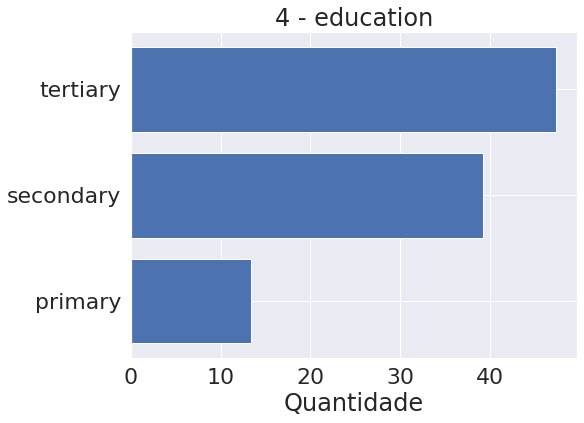

In [90]:
cluster_column_name = ['primary', 'secondary', 'tertiary']
cluster_column_value = [clustering_profiles_education_primary, clustering_profiles_education_secondary, clustering_profiles_education_tertiary]

x = np.array(cluster_column_name)
y = np.array(cluster_column_value)

plt.figure(figsize=(8,6))
plt.xlabel('Quantidade') 
#plt.ylabel('coluna') 
plt.title('4 - education')
plt.barh(x, y, color = 'b')
plt.show()

##Default, housing and loan

In [91]:
clustering_profiles_default = (clustering_discription_profiles.query('default == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_default

0.0

In [92]:
clustering_profiles_housing = (clustering_discription_profiles.query('housing == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_housing

31.892697466467958

In [93]:
clustering_profiles_loan = (clustering_discription_profiles.query('loan == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_loan

4.172876304023845

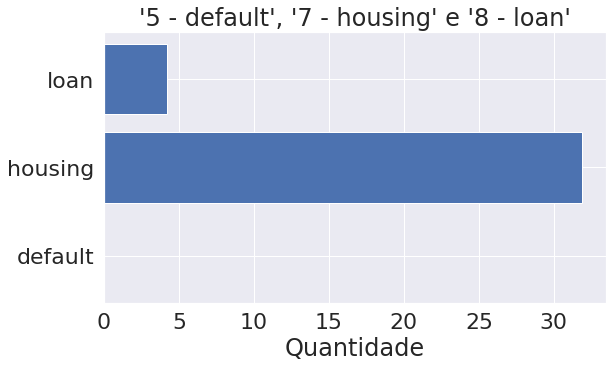

In [94]:
clustering_profiles_default = (clustering_discription_profiles.query('default == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_housing = (clustering_discription_profiles.query('housing == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_loan = (clustering_discription_profiles.query('loan == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
cluster_column_name = ['default', 'housing', 'loan']
cluster_column_value = [clustering_profiles_default, clustering_profiles_housing, clustering_profiles_loan]

x = np.array(cluster_column_name)
y = np.array(cluster_column_value)

plt.figure(figsize=(9,5))
plt.xlabel('Quantidade') 
#plt.ylabel('coluna') 
plt.title("'5 - default', '7 - housing' e '8 - loan'")
plt.barh(x, y, color = 'b')
plt.show()

##Contact

In [95]:
clustering_profiles_contact_cellular = (clustering_discription_profiles.query('contact_cellular == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_contact_cellular	

80.32786885245902

In [96]:
clustering_profiles_contact_telephone = (clustering_discription_profiles.query('contact_telephone == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_contact_telephone	

12.071535022354695

In [97]:
clustering_profiles_contact_unknown = (clustering_discription_profiles.query('contact_unknown == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_contact_unknown	

7.600596125186289

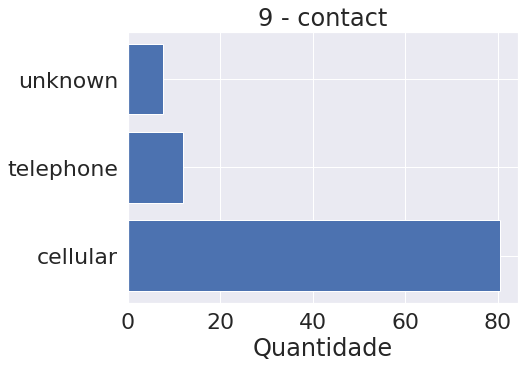

In [98]:
cluster_column_name = ['cellular', 'telephone', 'unknown']
cluster_column_value = [clustering_profiles_contact_cellular, clustering_profiles_contact_telephone, clustering_profiles_contact_unknown]

x = np.array(cluster_column_name)
y = np.array(cluster_column_value)

plt.figure(figsize=(7,5))
plt.xlabel('Quantidade') 
#plt.ylabel('coluna') 
plt.title('9 - contact')
plt.barh(x, y, color = 'b')
plt.show()

##Day

In [99]:
day = x_clustering(clustering_discription_profiles, 1, 20, 7, 'day')
day

[[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [22, 22, 24, 13, 22, 37, 25, 29, 27, 17, 18, 31, 18, 35]]

In [100]:
#Nº de Respostas
day_x = day[1]
day_x

[22, 22, 24, 13, 22, 37, 25, 29, 27, 17, 18, 31, 18, 35]

In [101]:
#Nº de Dias
day_y = day[0]
day_y

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

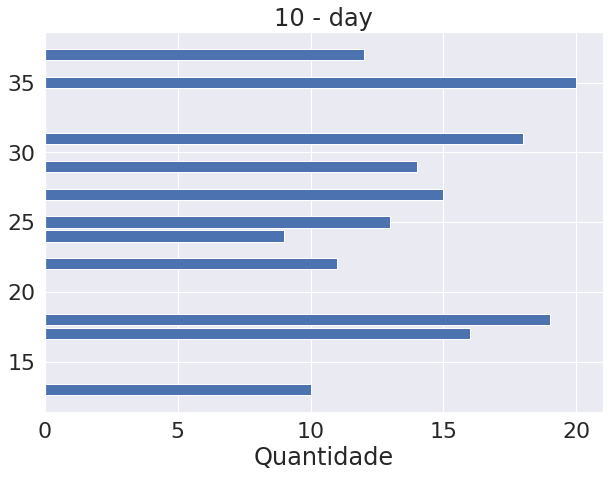

In [117]:
plt.figure(figsize=(10,7))
plt.xlabel('Quantidade') 
#plt.ylabel('coluna') 
plt.title('10 - day')
plt.barh(day_x, day_y, color = 'b')
plt.show()

##Campaign

In [103]:
campaign = x_clustering(clustering_discription_profiles, 1, 20, 7, 'campaign')
campaign

[[7, 8, 9, 10, 11], [6, 4, 5, 2, 2]]

In [104]:
#Nº de Respostas
campaign_x = campaign[1]
campaign_x

[6, 4, 5, 2, 2]

In [105]:
#Nº de Dias
campaign_y = campaign[0]
campaign_y

[7, 8, 9, 10, 11]

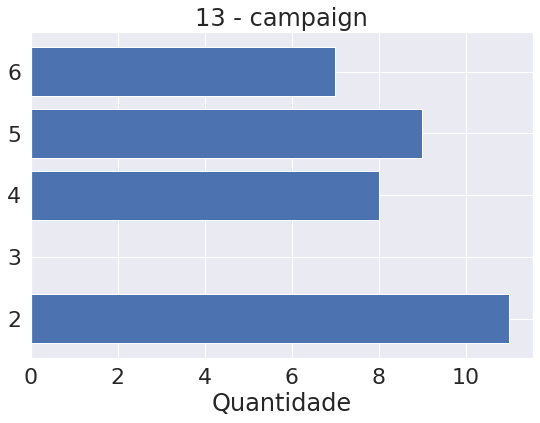

In [106]:
plt.figure(figsize=(9,6))
plt.xlabel('Quantidade') 
#plt.ylabel('coluna') 
plt.title('13 - campaign')
plt.barh(campaign_x, campaign_y, color = 'b')
plt.show()

##Poutcome

In [107]:
clustering_profiles_poutcome_failure = (clustering_discription_profiles.query('poutcome_failure == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_poutcome_failure

11.624441132637854

In [108]:
clustering_profiles_poutcome_other = (clustering_discription_profiles.query('poutcome_other == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_poutcome_other

7.153502235469449

In [109]:
	
clustering_profiles_poutcome_success = (clustering_discription_profiles.query('poutcome_success == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_poutcome_success

18.7779433681073

In [110]:
clustering_profiles_poutcome_unknown = (clustering_discription_profiles.query('poutcome_unknown == 1').shape[0] *100) / clustering_discription_profiles.shape[0]
clustering_profiles_poutcome_unknown

62.4441132637854

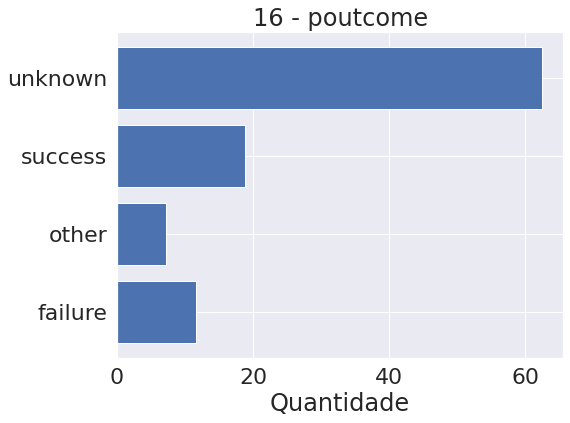

In [111]:
cluster_column_name = ['failure', 'other', 'success', 'unknown']
cluster_column_value = [clustering_profiles_poutcome_failure, clustering_profiles_poutcome_other, clustering_profiles_poutcome_success, clustering_profiles_poutcome_unknown]

x = np.array(cluster_column_name)
y = np.array(cluster_column_value)

plt.figure(figsize=(8,6))
plt.xlabel('Quantidade') 
#plt.ylabel('coluna') 
plt.title('16 - poutcome')
plt.barh(x, y, color = 'b')
plt.show()